In [24]:
import torch
from torch import nn
import torch.utils.data as Data
import torch.optim as optim
import numpy as np
from os.path import join as PJ
import matplotlib.pyplot as plt 

In [25]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image,ImageOps

In [26]:
import tensorflow as tf

In [28]:
def LoadFiles(mode="train"):
    if mode == "train":
        with open(TrainFile, 'r') as trainf:
            image_info = trainf.readlines()
            image_info = [path.strip().split() for path in image_info]
            image_info = np.asarray(image_info)

            # Split to image path and label
            image_paths = image_info[:, 0]
            label_ids = image_info[:, 1].astype(int)

#             labels = tf.one_hot(label_ids, num_class, dtype=tf.int32)
            print("in Load : ", label_ids.shape)
            return image_paths, label_ids
    else:
        with open(TestFile, 'r') as testf:
            image_info = testf.readlines()
            image_info = [path.strip().split() for path in image_info]
            image_info = np.asarray(image_info)

            # Split to image path and label
            image_paths = image_info[:, 0]
            label_ids = image_info[:, 1].astype(int)
#             labels = tf.one_hot(label_ids, num_class, dtype=tf.int32)
            return image_paths, label_ids

In [29]:
import cv2
class TermiteDataset(Dataset):
    def __init__(self, data_file, transform):
        with open(data_file, 'r') as f:
            image_info = f.readlines()
        image_info = [path.strip().split() for path in image_info]
        image_info = np.asarray(image_info)

        # Split to image path and label
        self.image_paths = image_info[:, 0]
        self.label_ids = image_info[:, 1].astype(int)
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
#         print(idx, self.label_ids.shape, self.label_ids[idx])
        label = self.label_ids[idx]
        image_path = self.image_paths[idx]
        original_image = Image.open(image_path).convert('RGB')
        
#         print(original_image.size)
        
        if original_image.size[0] > 1000:
            original_image = original_image.resize((1000, original_image.size[1]*1000//original_image.size[0]))
        elif original_image.size[1] > 1000:
            original_image = original_image.resize((original_image.size[0]*1000//original_image.size[1], 1000))
#         print(original_image.shape)
        left = 500-original_image.size[0]//2
        right = 500-original_image.size[0]//2
        top = 500-original_image.size[1]//2
        bottom = 500-original_image.size[1]//2
        
        if left + right + original_image.size[0] != 1000:
            right = 1000 - left - original_image.size[0]
        if top + bottom + original_image.size[1] != 1000:
            top = 1000 - bottom - original_image.size[1]
        
#         original_image= cv2.copyMakeBorder(original_image,left,right,top,bottom,cv2.BORDER_CONSTANT,value=(0, 0, 0))
        original_image = ImageOps.expand(original_image, border=(left,top,right,bottom), fill=0)##left,top,right,bottom
        original_image = original_image.resize((130,130))
        transform1 = transforms.Compose([transforms.ToTensor()])
        original_image = transform1(original_image)
#         print(original_image.shape)
        
        
#         original_image = self.transform(original_image)
#         original_image.permute(2,0,1)
#         print(original_image.shape, answer.shape)
        return label, original_image, self.image_paths[idx]

def transform_set(train, new_size=None, pad=None):
    """
    train: True or False
    new_size: int or tuple
    
    """
#     transform_list = [transforms.ToTensor(),
#                       transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])]
    transform_list = [transforms.ToTensor()]
    # replace centercrop to padding
#     transform_list = [transforms.CenterCrop((crop_h, crop_w))] + transform_list if crop else transform_list
#     transform_list = [transforms.Resize(new_size)] + transform_list if new_size is not None else transform_list

#     transform_list = [transforms.RandomHorizontalFlip()] + transform_list if train else transform_list
    transform = transforms.Compose(transform_list)
    return transform

In [30]:
def CheckFile(filename):
    with open(filename, 'r') as f:
            image_info = f.readlines()
    image_info = [path.strip().split() for path in image_info]
    image_info = np.asarray(image_info)
    counts = {"台灣土白蟻兵蟻" : 0,
             "台灣土白蟻工蟻" : 0,
             "台灣家白蟻兵蟻" : 0,
             "台灣家白蟻工蟻" : 0,
             "截頭堆沙兵蟻" : 0,
             "截頭堆沙工蟻" : 0,
             "黃肢散工蟻" : 0,
             "黃肢散兵蟻" : 0,
             "背景": 0}
        
    Locations = {"L1" : 0,
             "L2" : 0,
             "L3" : 0}
    for line in image_info:
        path = line[0]
        if "L1" in path:
            Locations["L1"] += 1
        if "L2" in path:
            Locations["L2"] += 1
        if "L3" in path:
            Locations["L3"] += 1
        if "台灣土白蟻兵蟻" in path:
            counts["台灣土白蟻兵蟻"] += 1
        if "台灣土白蟻工蟻" in path:
            counts["台灣土白蟻工蟻"] += 1
        if "台灣家白蟻兵蟻" in path:
            counts["台灣家白蟻兵蟻"] += 1
        if "台灣家白蟻工蟻" in path:
            counts["台灣家白蟻工蟻"] += 1
        if "截頭堆沙兵蟻" in path:
            counts["截頭堆沙兵蟻"] += 1
        if "截頭堆沙工蟻" in path:
            counts["截頭堆沙工蟻"] += 1
        if "黃肢散兵蟻" in path:
            counts["黃肢散兵蟻"] += 1
        if "黃肢散工蟻" in path:
            counts["黃肢散工蟻"] += 1
        if "背景" in path:
            counts["背景"] += 1
    print(Locations, counts)

In [31]:
BATCH_SIZE = 64
EPOCH = 100
LearningRate = 0.0001
Momentum = 0.9
TrainFile = "/home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_trainfile_3_200aug.txt"
ValFile = "/home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_valfile_3_200aug.txt"
TestFile = "/home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_testfile_L12.txt"
# classes = ["O. formosanus Army","O. formosanus Worker", "C. formosanus Army","C. formosanus Worker", "C. domesticus Army","C. domesticus Worker", "R. flaviceps Worker", "R. flaviceps Army"]
classes = ["O.f Soldier","O.f Worker", "C.f Soldier","C.f Worker", "C.d Soldier","C.d Worker", "R.f Soldier", "R.f Worker"]
#"台灣土白蟻兵蟻", "台灣土白蟻工蟻", "台灣家白蟻兵蟻", "台灣家白蟻工蟻","截頭堆沙兵蟻", "截頭堆沙工蟻", "黃肢散兵蟻",   "黃肢散工蟻"
model_directory = "/home/ytliu/Termite-Bonnie/PAPER_termite/*BENCHMARK-LARGE_3_200aug/"
temp_directory = "/home/ytliu/Termite-Bonnie/PAPER_termite/*BENCHMARK-LARGE_3_200aug/"

In [32]:
print("TrainFile : ", TrainFile)
print("ValidationFile : ", ValFile)
print("TestFile : ", TestFile)
CheckFile(TrainFile)
CheckFile(ValFile)
CheckFile(TestFile)

TrainFile :  /home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_trainfile_L12_CFselected_200aug.txt
ValidationFile :  /home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_valfile_L12_CFselected_200aug.txt
TestFile :  /home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_testfile_L12.txt
{'L1': 6400, 'L2': 6400, 'L3': 0} {'台灣土白蟻兵蟻': 1600, '台灣土白蟻工蟻': 1600, '台灣家白蟻兵蟻': 1600, '台灣家白蟻工蟻': 1600, '截頭堆沙兵蟻': 1600, '截頭堆沙工蟻': 1600, '黃肢散工蟻': 1600, '黃肢散兵蟻': 1600, '背景': 0}
{'L1': 1600, 'L2': 1600, 'L3': 0} {'台灣土白蟻兵蟻': 400, '台灣土白蟻工蟻': 400, '台灣家白蟻兵蟻': 400, '台灣家白蟻工蟻': 400, '截頭堆沙兵蟻': 400, '截頭堆沙工蟻': 400, '黃肢散工蟻': 400, '黃肢散兵蟻': 400, '背景': 0}
{'L1': 0, 'L2': 0, 'L3': 8000} {'台灣土白蟻兵蟻': 1000, '台灣土白蟻工蟻': 1000, '台灣家白蟻兵蟻': 1000, '台灣家白蟻工蟻': 1000, '截頭堆沙兵蟻': 1000, '截頭堆沙工蟻': 1000, '黃肢散工蟻': 1000, '黃肢散兵蟻': 1000, '背景': 0}


In [33]:
import torchvision.models as models
import os
# from MobileNetV2 import MobileNetV2
print(torch.__version__)
torch.cuda.set_device(0)
print(torch.cuda.current_device())
# mobilenet =  MobileNetV2(n_class=len(classes)).cuda()
mobilenet =  nn.Sequential(models.mobilenet_v2(pretrained=True), nn.Linear(1000, len(classes))).cuda()

1.3.0
0


In [34]:
model = mobilenet
# model = MobileNet(len(classes))
# model.to(cuda)
# model = model.cuda()
model = model
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LearningRate, momentum=Momentum)

In [35]:
transform = transform_set(train=True)
trainset = TermiteDataset(TrainFile, transform)
trainloader = Data.DataLoader(
    dataset=trainset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=0,              # 多线程来读数据
)

In [36]:
transform2 = transform_set(train=False)
valset = TermiteDataset(ValFile, transform2)
valloader = Data.DataLoader(
    dataset=valset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=0,              # 多线程来读数据
)

In [ ]:
# for labels, images in loader:
#     print(labels.shape)
#     print(images.shape)
#     ssssss

# TRAIN
### 
### validation

Train
[1, 00020] loss: 46.120 acc: 0.201
[1, 00040] loss: 78.844 acc: 0.304
[1, 00060] loss: 103.109 acc: 0.390
[1, 00080] loss: 123.934 acc: 0.442
[1, 00100] loss: 143.012 acc: 0.485
[1, 00120] loss: 160.205 acc: 0.516
[1, 00140] loss: 175.679 acc: 0.545
[1, 00160] loss: 191.658 acc: 0.564
[1, 00180] loss: 204.964 acc: 0.586
[1, 00200] loss: 217.316 acc: 0.604
[0.6040625]
[217.3159637451172]


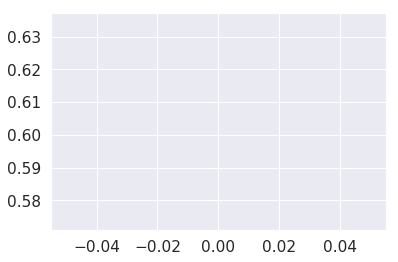

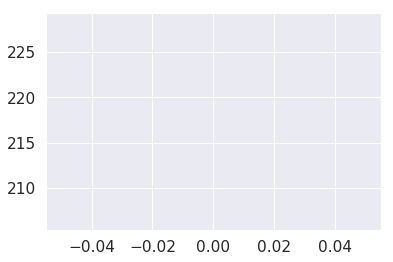

Validation
[0.78]
[30.13617369532585]


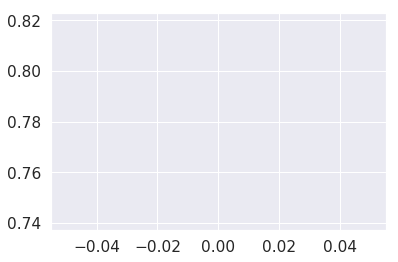

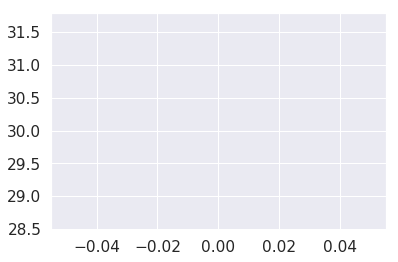


[1] accuracy: 0.780 loss: 30.136

runtime :  518.6859035491943
Train
[2, 00020] loss: 11.003 acc: 0.796
[2, 00040] loss: 22.368 acc: 0.791
[2, 00060] loss: 32.697 acc: 0.802
[2, 00080] loss: 42.326 acc: 0.806
[2, 00100] loss: 51.613 acc: 0.811
[2, 00120] loss: 61.010 acc: 0.814
[2, 00140] loss: 70.258 acc: 0.817
[2, 00160] loss: 78.559 acc: 0.821
[2, 00180] loss: 86.793 acc: 0.824
[2, 00200] loss: 95.257 acc: 0.827
[0.6040625, 0.826640625]
[217.3159637451172, 95.257428586483]


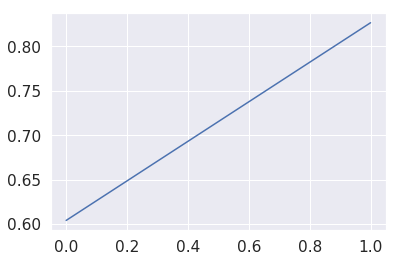

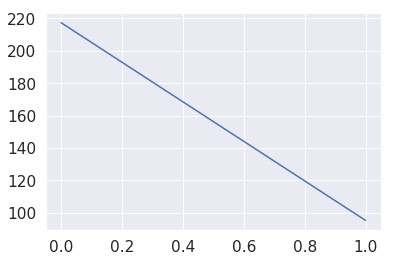

Validation
[0.78, 0.844375]
[30.13617369532585, 21.062145113945007]


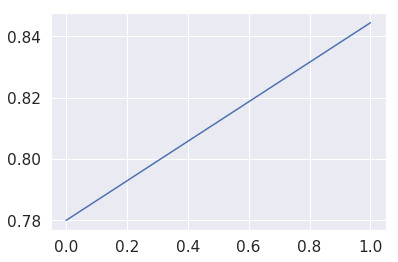

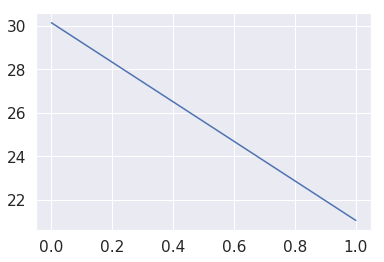


[2] accuracy: 0.844 loss: 21.062

runtime :  1040.9668090343475
Train
[3, 00020] loss: 7.532 acc: 0.878
[3, 00040] loss: 14.609 acc: 0.879
[3, 00060] loss: 21.161 acc: 0.882
[3, 00080] loss: 27.675 acc: 0.883
[3, 00100] loss: 34.290 acc: 0.884
[3, 00120] loss: 41.218 acc: 0.882
[3, 00140] loss: 47.519 acc: 0.880
[3, 00160] loss: 53.410 acc: 0.882
[3, 00180] loss: 59.290 acc: 0.883
[3, 00200] loss: 65.866 acc: 0.882
[0.6040625, 0.826640625, 0.88234375]
[217.3159637451172, 95.257428586483, 65.86597684025764]


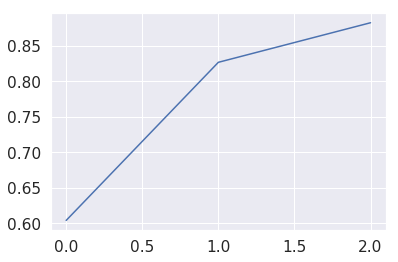

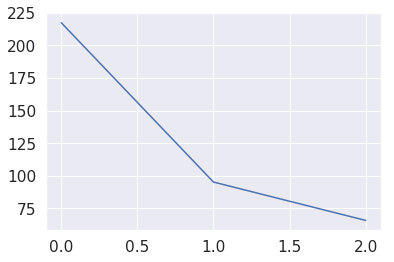

Validation
[0.78, 0.844375, 0.86375]
[30.13617369532585, 21.062145113945007, 18.416689708828926]


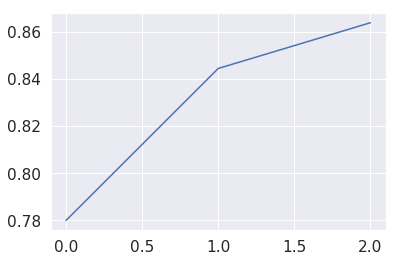

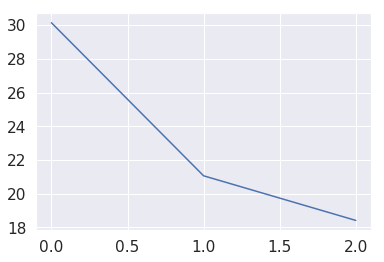


[3] accuracy: 0.864 loss: 18.417

runtime :  1562.7791035175323
Train
[4, 00020] loss: 5.103 acc: 0.916
[4, 00040] loss: 10.282 acc: 0.913
[4, 00060] loss: 15.072 acc: 0.916
[4, 00080] loss: 20.225 acc: 0.912
[4, 00100] loss: 25.345 acc: 0.911
[4, 00120] loss: 30.042 acc: 0.911
[4, 00140] loss: 35.031 acc: 0.911
[4, 00160] loss: 39.915 acc: 0.912
[4, 00180] loss: 44.490 acc: 0.912
[4, 00200] loss: 49.196 acc: 0.913
[0.6040625, 0.826640625, 0.88234375, 0.91296875]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869]


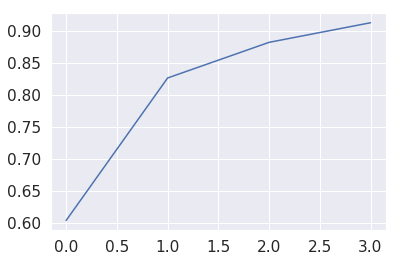

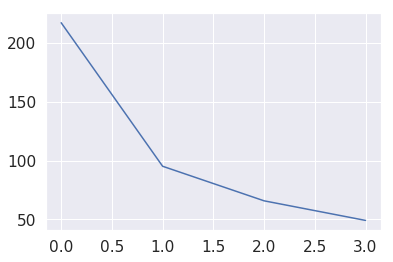

Validation
[0.78, 0.844375, 0.86375, 0.8978125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166]


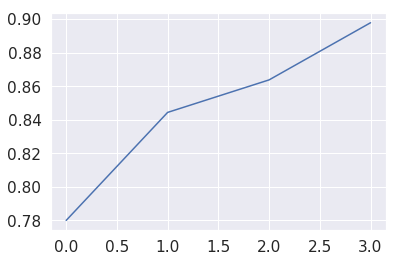

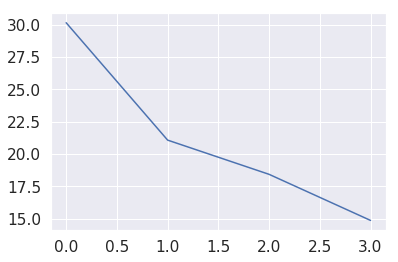


[4] accuracy: 0.898 loss: 14.854

runtime :  2084.5515513420105
Train
[5, 00020] loss: 4.331 acc: 0.926
[5, 00040] loss: 8.288 acc: 0.927
[5, 00060] loss: 12.535 acc: 0.928
[5, 00080] loss: 16.283 acc: 0.931
[5, 00100] loss: 19.680 acc: 0.934
[5, 00120] loss: 22.951 acc: 0.937
[5, 00140] loss: 26.874 acc: 0.936
[5, 00160] loss: 30.638 acc: 0.936
[5, 00180] loss: 34.272 acc: 0.936
[5, 00200] loss: 38.046 acc: 0.936
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035]


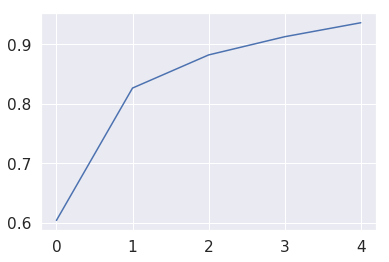

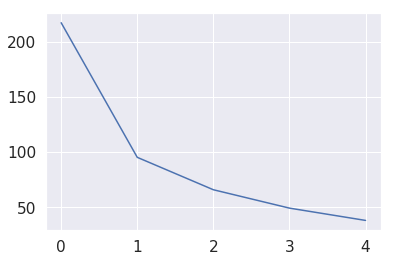

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518]


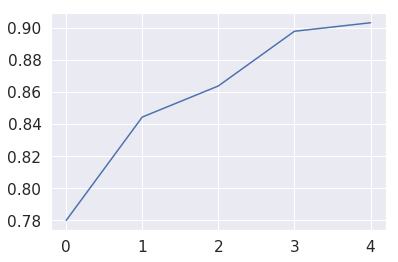

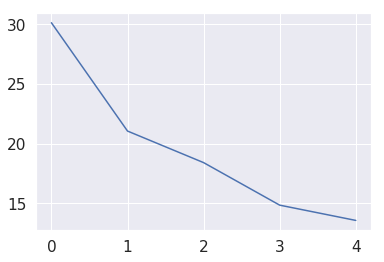


[5] accuracy: 0.903 loss: 13.575

runtime :  2604.0921454429626
Train
[6, 00020] loss: 3.052 acc: 0.943
[6, 00040] loss: 6.364 acc: 0.941
[6, 00060] loss: 9.794 acc: 0.943
[6, 00080] loss: 12.448 acc: 0.947
[6, 00100] loss: 15.377 acc: 0.948
[6, 00120] loss: 18.157 acc: 0.949
[6, 00140] loss: 21.217 acc: 0.949
[6, 00160] loss: 24.534 acc: 0.948
[6, 00180] loss: 27.623 acc: 0.947
[6, 00200] loss: 30.394 acc: 0.948
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137]


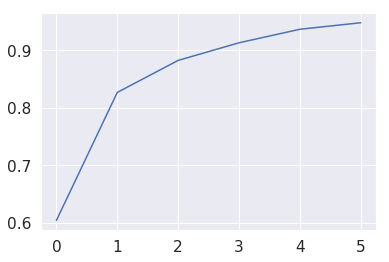

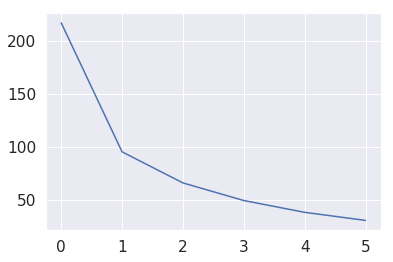

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585]


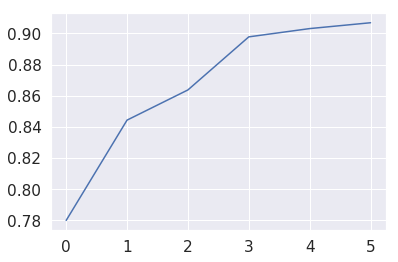

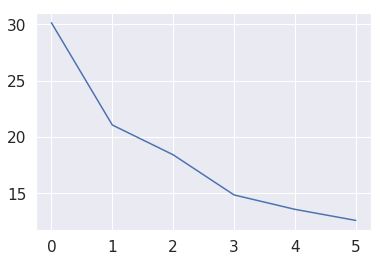


[6] accuracy: 0.907 loss: 12.591

runtime :  3121.2977867126465
Train
[7, 00020] loss: 2.363 acc: 0.964
[7, 00040] loss: 4.952 acc: 0.958
[7, 00060] loss: 7.662 acc: 0.958
[7, 00080] loss: 10.395 acc: 0.955
[7, 00100] loss: 12.698 acc: 0.958
[7, 00120] loss: 15.233 acc: 0.957
[7, 00140] loss: 18.014 acc: 0.956
[7, 00160] loss: 20.695 acc: 0.956
[7, 00180] loss: 23.012 acc: 0.957
[7, 00200] loss: 25.568 acc: 0.957
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365]


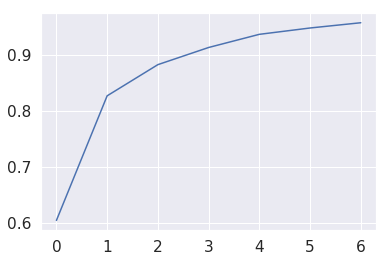

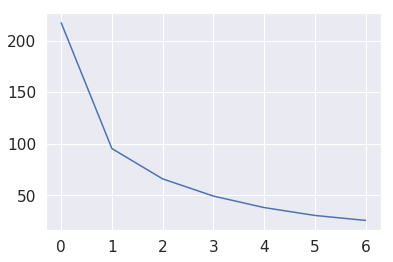

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605]


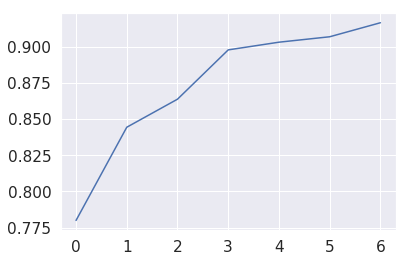

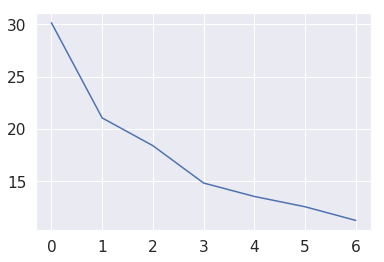


[7] accuracy: 0.917 loss: 11.289

runtime :  3645.355598449707
Train
[8, 00020] loss: 2.290 acc: 0.959
[8, 00040] loss: 4.645 acc: 0.962
[8, 00060] loss: 6.568 acc: 0.967
[8, 00080] loss: 8.641 acc: 0.966
[8, 00100] loss: 10.750 acc: 0.966
[8, 00120] loss: 12.764 acc: 0.967
[8, 00140] loss: 14.941 acc: 0.966
[8, 00160] loss: 16.842 acc: 0.967
[8, 00180] loss: 19.065 acc: 0.966
[8, 00200] loss: 21.052 acc: 0.966
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864]


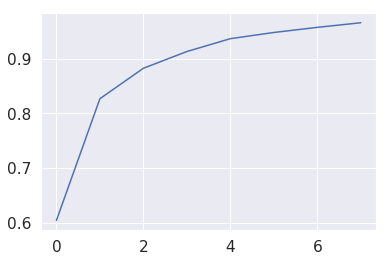

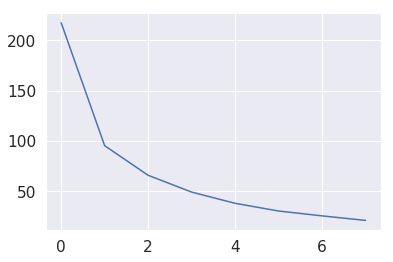

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855]


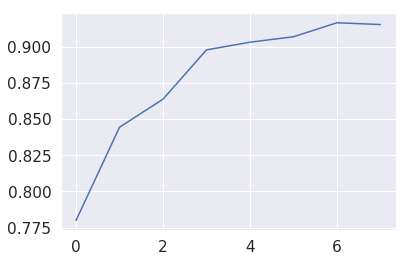

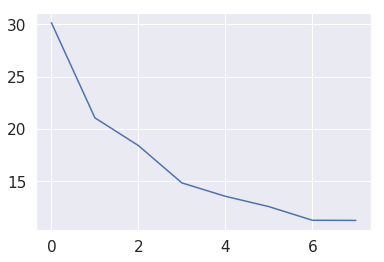


[8] accuracy: 0.915 loss: 11.273

runtime :  4169.087180614471
Train
[9, 00020] loss: 1.587 acc: 0.980
[9, 00040] loss: 3.074 acc: 0.979
[9, 00060] loss: 4.946 acc: 0.974
[9, 00080] loss: 6.612 acc: 0.973
[9, 00100] loss: 8.418 acc: 0.973
[9, 00120] loss: 10.334 acc: 0.972
[9, 00140] loss: 12.502 acc: 0.971
[9, 00160] loss: 14.387 acc: 0.971
[9, 00180] loss: 16.103 acc: 0.971
[9, 00200] loss: 18.018 acc: 0.971
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956]


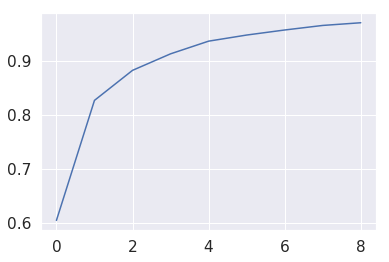

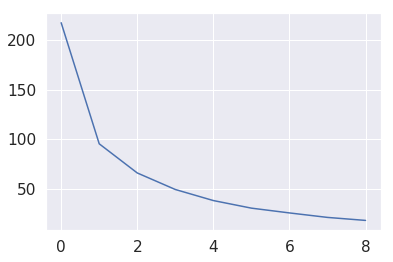

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048]


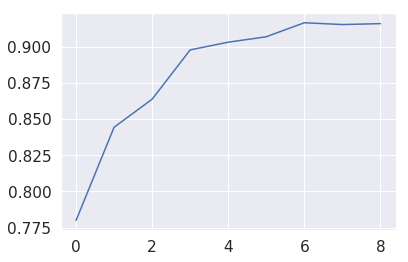

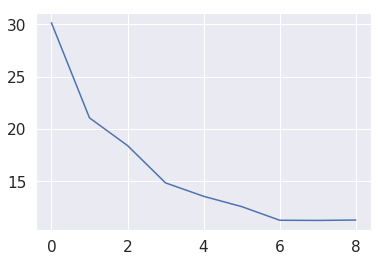


[9] accuracy: 0.916 loss: 11.309

runtime :  4692.101480484009
Train
[10, 00020] loss: 1.749 acc: 0.970
[10, 00040] loss: 3.176 acc: 0.971
[10, 00060] loss: 4.818 acc: 0.972
[10, 00080] loss: 6.178 acc: 0.974
[10, 00100] loss: 7.637 acc: 0.975
[10, 00120] loss: 9.163 acc: 0.975
[10, 00140] loss: 10.699 acc: 0.975
[10, 00160] loss: 12.303 acc: 0.975
[10, 00180] loss: 13.759 acc: 0.975
[10, 00200] loss: 15.227 acc: 0.975
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023]


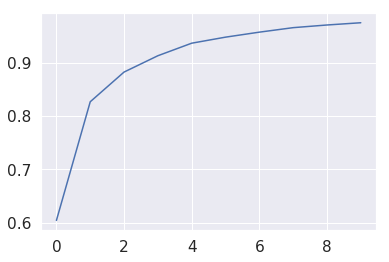

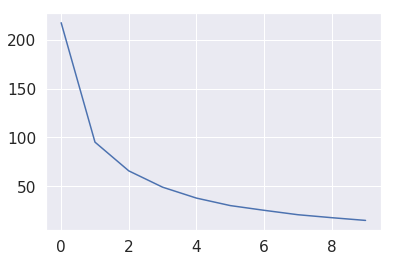

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426]


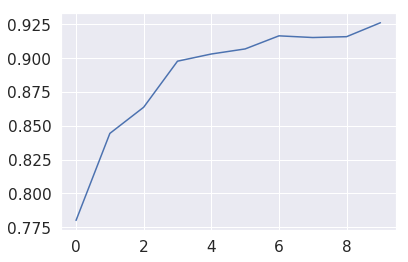

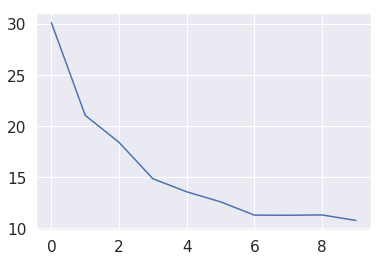


[10] accuracy: 0.926 loss: 10.770

runtime :  5218.518376111984
Train
[11, 00020] loss: 1.219 acc: 0.987
[11, 00040] loss: 2.406 acc: 0.986
[11, 00060] loss: 3.618 acc: 0.984
[11, 00080] loss: 5.053 acc: 0.981
[11, 00100] loss: 6.429 acc: 0.981
[11, 00120] loss: 7.584 acc: 0.982
[11, 00140] loss: 8.523 acc: 0.982
[11, 00160] loss: 9.760 acc: 0.982
[11, 00180] loss: 10.826 acc: 0.982
[11, 00200] loss: 12.200 acc: 0.982
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507]


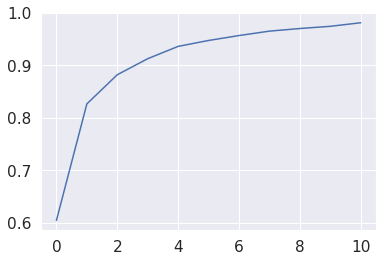

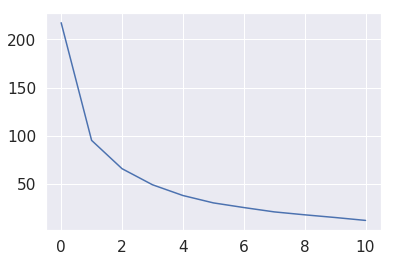

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509]


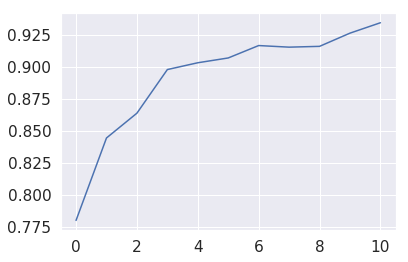

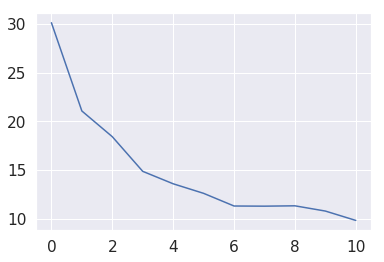


[11] accuracy: 0.934 loss: 9.807

runtime :  5742.098023176193
Train
[12, 00020] loss: 1.146 acc: 0.981
[12, 00040] loss: 2.075 acc: 0.984
[12, 00060] loss: 3.086 acc: 0.983
[12, 00080] loss: 4.458 acc: 0.980
[12, 00100] loss: 5.405 acc: 0.981
[12, 00120] loss: 6.565 acc: 0.981
[12, 00140] loss: 7.585 acc: 0.982
[12, 00160] loss: 8.496 acc: 0.983
[12, 00180] loss: 9.794 acc: 0.982
[12, 00200] loss: 10.669 acc: 0.983
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907]


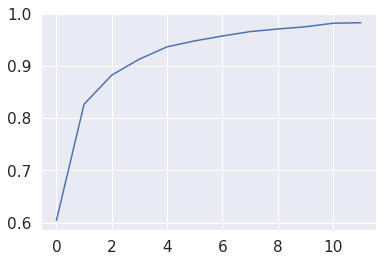

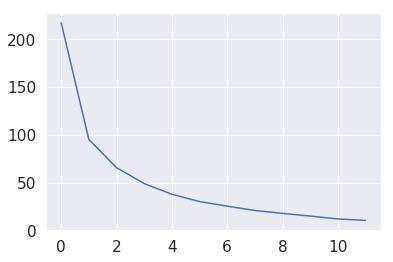

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952]


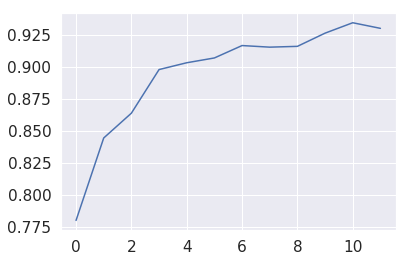

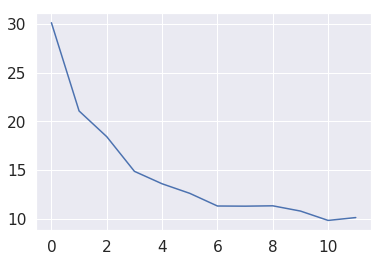


[12] accuracy: 0.930 loss: 10.100

runtime :  6267.166987419128
Train
[13, 00020] loss: 0.936 acc: 0.987
[13, 00040] loss: 1.817 acc: 0.990
[13, 00060] loss: 2.809 acc: 0.987
[13, 00080] loss: 3.866 acc: 0.986
[13, 00100] loss: 4.863 acc: 0.986
[13, 00120] loss: 5.689 acc: 0.987
[13, 00140] loss: 6.559 acc: 0.987
[13, 00160] loss: 7.397 acc: 0.987
[13, 00180] loss: 8.316 acc: 0.987
[13, 00200] loss: 9.323 acc: 0.986
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907, 9.32250141352415]


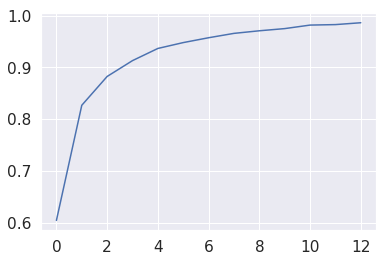

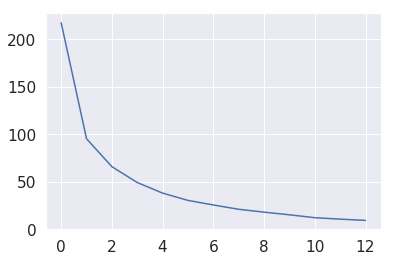

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302]


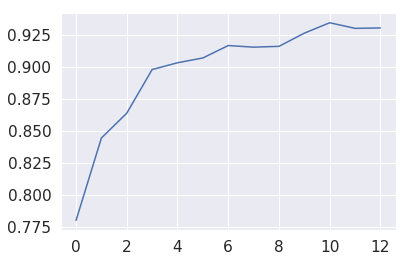

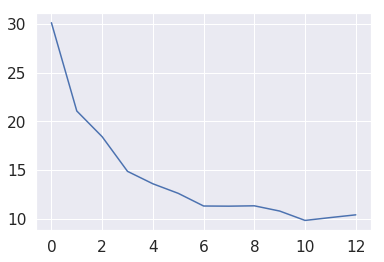


[13] accuracy: 0.930 loss: 10.381

runtime :  6790.77273273468
Train
[14, 00020] loss: 0.776 acc: 0.991
[14, 00040] loss: 1.561 acc: 0.991
[14, 00060] loss: 2.355 acc: 0.991
[14, 00080] loss: 3.231 acc: 0.990
[14, 00100] loss: 3.918 acc: 0.991
[14, 00120] loss: 4.957 acc: 0.989
[14, 00140] loss: 5.799 acc: 0.989
[14, 00160] loss: 6.568 acc: 0.989
[14, 00180] loss: 7.280 acc: 0.989
[14, 00200] loss: 7.928 acc: 0.989
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907, 9.32250141352415, 7.928083159029484]


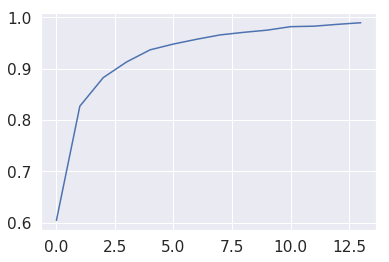

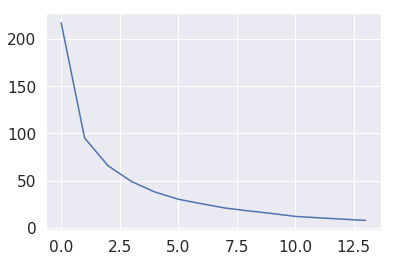

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651]


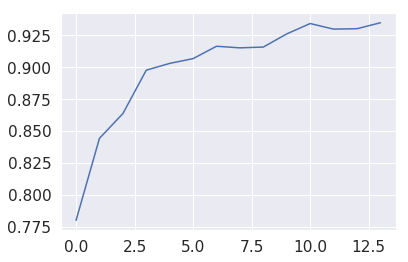

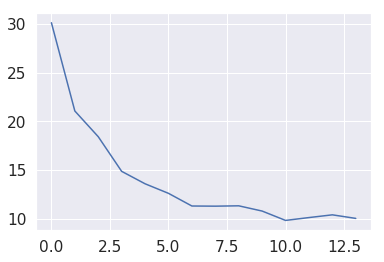


[14] accuracy: 0.935 loss: 10.014

runtime :  7315.836781263351
Train
[15, 00020] loss: 0.528 acc: 0.995
[15, 00040] loss: 1.319 acc: 0.991
[15, 00060] loss: 2.136 acc: 0.991
[15, 00080] loss: 3.105 acc: 0.989
[15, 00100] loss: 3.763 acc: 0.990
[15, 00120] loss: 4.548 acc: 0.989
[15, 00140] loss: 5.422 acc: 0.989
[15, 00160] loss: 6.162 acc: 0.989
[15, 00180] loss: 7.017 acc: 0.989
[15, 00200] loss: 7.642 acc: 0.989
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907, 9.32250141352415, 7.928083159029484, 7.6420090310275555]


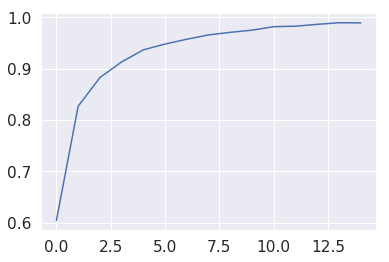

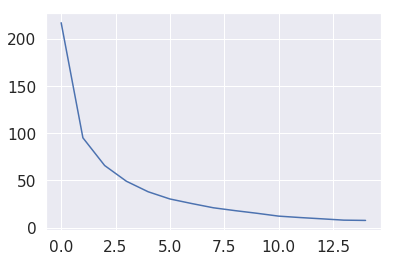

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241]


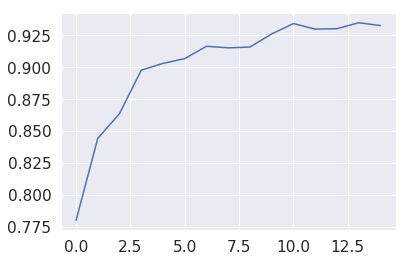

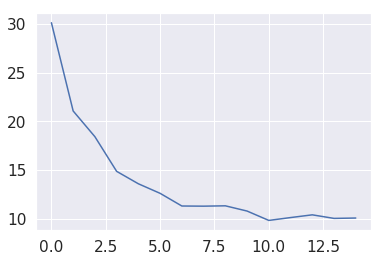


[15] accuracy: 0.933 loss: 10.052

runtime :  7843.198177814484
Train
[16, 00020] loss: 0.696 acc: 0.992
[16, 00040] loss: 1.313 acc: 0.992
[16, 00060] loss: 1.956 acc: 0.992
[16, 00080] loss: 2.796 acc: 0.990
[16, 00100] loss: 3.340 acc: 0.991
[16, 00120] loss: 3.981 acc: 0.991
[16, 00140] loss: 4.536 acc: 0.992
[16, 00160] loss: 5.203 acc: 0.992
[16, 00180] loss: 5.930 acc: 0.992
[16, 00200] loss: 6.464 acc: 0.992
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907, 9.32250141352415, 7.928083159029484, 7.6420090310275555, 6.463660001754761]


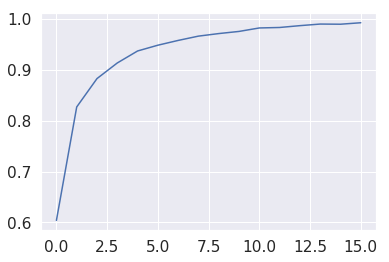

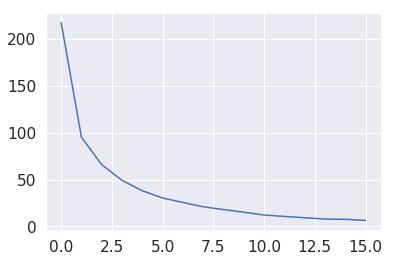

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573]


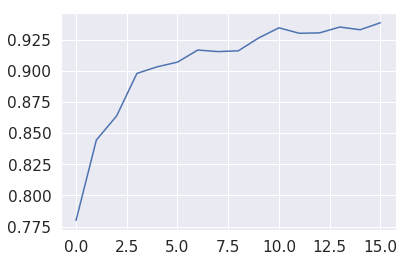

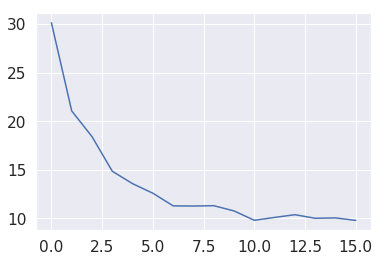


[16] accuracy: 0.938 loss: 9.793

runtime :  8367.972139120102
Train
[17, 00020] loss: 0.501 acc: 0.996
[17, 00040] loss: 1.114 acc: 0.995
[17, 00060] loss: 1.754 acc: 0.993
[17, 00080] loss: 2.225 acc: 0.994
[17, 00100] loss: 2.783 acc: 0.994
[17, 00120] loss: 3.384 acc: 0.993
[17, 00140] loss: 3.844 acc: 0.994
[17, 00160] loss: 4.553 acc: 0.993
[17, 00180] loss: 5.017 acc: 0.993
[17, 00200] loss: 5.540 acc: 0.993
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907, 9.32250141352415, 7.928083159029484, 7.6420090310275555, 6.463660001754761, 5.540363367646933]


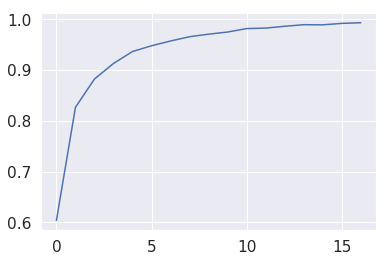

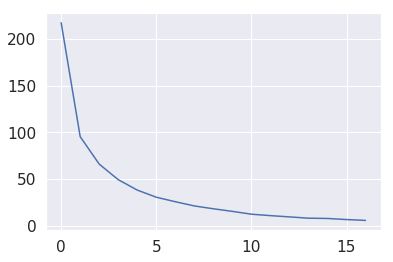

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332]


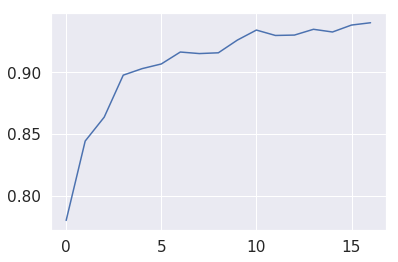

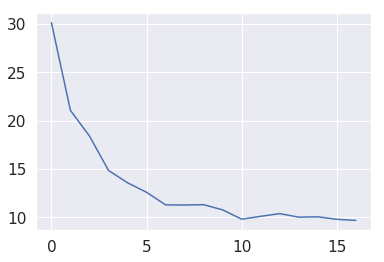


[17] accuracy: 0.940 loss: 9.678

runtime :  8894.02508020401
Train
[18, 00020] loss: 0.536 acc: 0.996
[18, 00040] loss: 1.102 acc: 0.995
[18, 00060] loss: 1.654 acc: 0.994
[18, 00080] loss: 2.207 acc: 0.994
[18, 00100] loss: 2.717 acc: 0.994
[18, 00120] loss: 3.284 acc: 0.994
[18, 00140] loss: 3.869 acc: 0.993
[18, 00160] loss: 4.246 acc: 0.994
[18, 00180] loss: 4.728 acc: 0.994
[18, 00200] loss: 5.299 acc: 0.994
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907, 9.32250141352415, 7.928083159029484, 7.6420090310275555, 6.463660001754761, 5.540363367646933, 5.298780728131533]


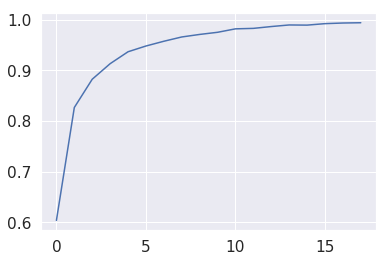

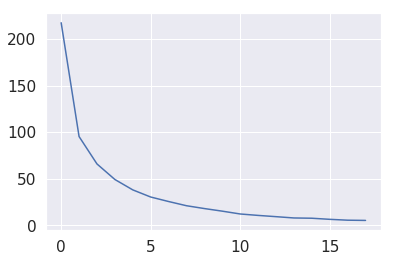

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226]


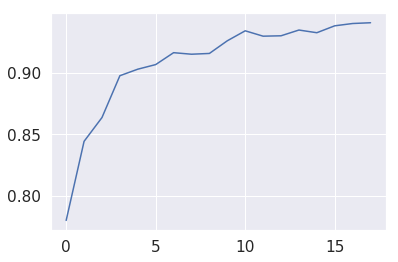

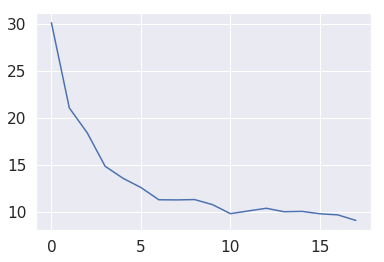


[18] accuracy: 0.941 loss: 9.089

runtime :  9419.564708948135
Train
[19, 00020] loss: 0.476 acc: 0.996
[19, 00040] loss: 0.796 acc: 0.997
[19, 00060] loss: 1.374 acc: 0.995
[19, 00080] loss: 1.797 acc: 0.996
[19, 00100] loss: 2.215 acc: 0.996
[19, 00120] loss: 2.655 acc: 0.996
[19, 00140] loss: 2.988 acc: 0.996
[19, 00160] loss: 3.302 acc: 0.996
[19, 00180] loss: 3.690 acc: 0.996
[19, 00200] loss: 3.988 acc: 0.996
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907, 9.32250141352415, 7.928083159029484, 7.6420090310275555, 6.463660001754761, 5.540363367646933, 5.298780728131533, 3.98767794

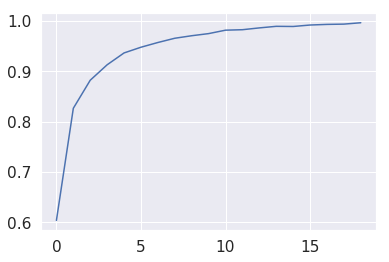

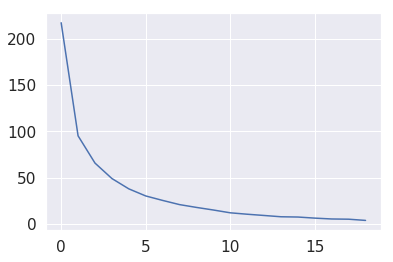

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962]


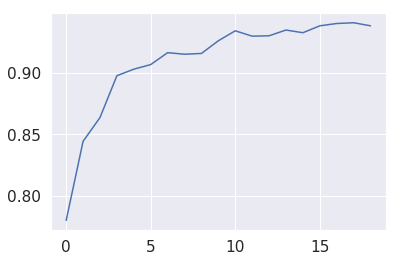

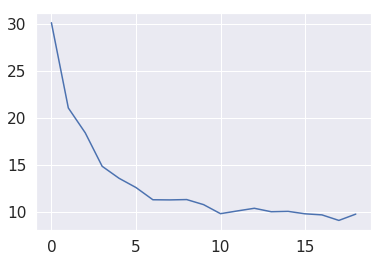


[19] accuracy: 0.938 loss: 9.761

runtime :  9940.759550333023
Train
[20, 00020] loss: 0.461 acc: 0.997
[20, 00040] loss: 0.886 acc: 0.996
[20, 00060] loss: 1.226 acc: 0.997
[20, 00080] loss: 1.640 acc: 0.996
[20, 00100] loss: 1.999 acc: 0.996
[20, 00120] loss: 2.416 acc: 0.996
[20, 00140] loss: 2.709 acc: 0.997
[20, 00160] loss: 3.000 acc: 0.997
[20, 00180] loss: 3.418 acc: 0.996
[20, 00200] loss: 3.932 acc: 0.996
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907, 9.32250141352415, 7.928083159029484, 7.6420090310275555, 6.463660001754761, 5.540363367646933, 5.298780728131533,

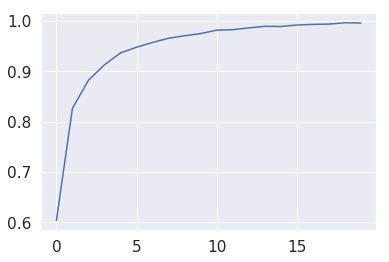

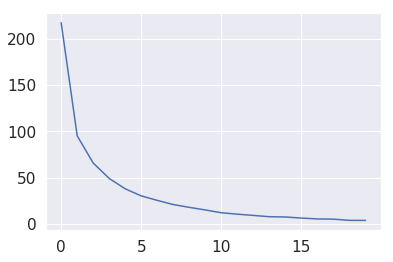

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449]


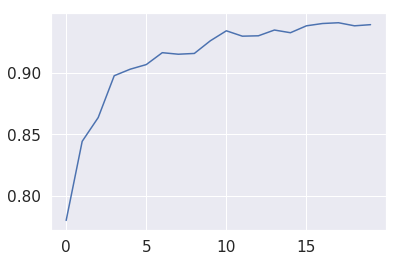

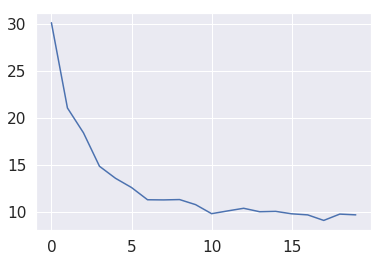


[20] accuracy: 0.939 loss: 9.681

runtime :  10463.650048017502
Train
[21, 00020] loss: 0.293 acc: 0.998
[21, 00040] loss: 0.729 acc: 0.996
[21, 00060] loss: 1.037 acc: 0.996
[21, 00080] loss: 1.443 acc: 0.996
[21, 00100] loss: 1.860 acc: 0.996
[21, 00120] loss: 2.445 acc: 0.995
[21, 00140] loss: 2.950 acc: 0.995
[21, 00160] loss: 3.332 acc: 0.995
[21, 00180] loss: 3.642 acc: 0.995
[21, 00200] loss: 4.351 acc: 0.995
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907, 9.32250141352415, 7.928083159029484, 7.6420090310275555, 6.463660001754761, 5.540363367646933, 5.29

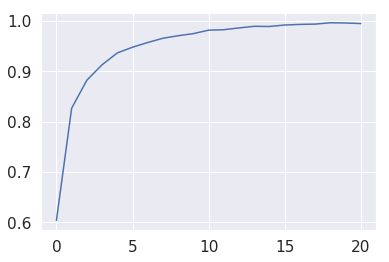

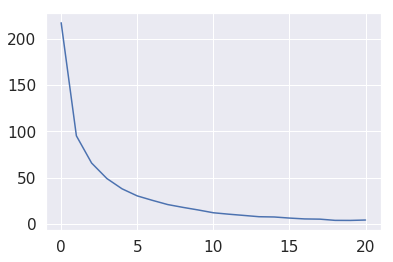

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321]


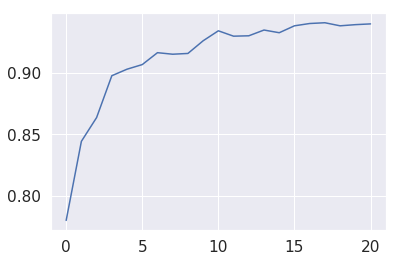

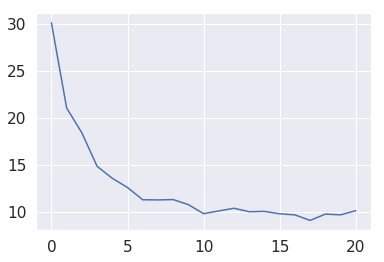


[21] accuracy: 0.940 loss: 10.128

runtime :  10988.11055135727
Train
[22, 00020] loss: 0.258 acc: 0.999
[22, 00040] loss: 0.712 acc: 0.997
[22, 00060] loss: 1.121 acc: 0.996
[22, 00080] loss: 1.511 acc: 0.995
[22, 00100] loss: 1.891 acc: 0.995
[22, 00120] loss: 2.240 acc: 0.996
[22, 00140] loss: 2.589 acc: 0.996
[22, 00160] loss: 2.868 acc: 0.996
[22, 00180] loss: 3.229 acc: 0.996
[22, 00200] loss: 3.584 acc: 0.996
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907, 9.32250141352415, 7.928083159029484, 7.6420090310275555, 6.463660001754761, 5.54036336

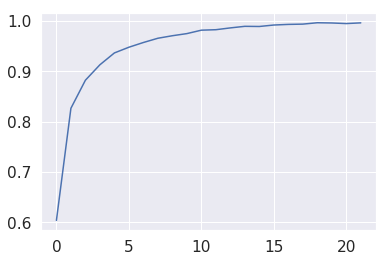

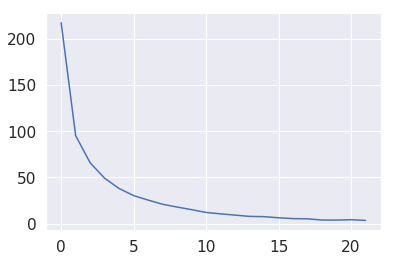

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696]


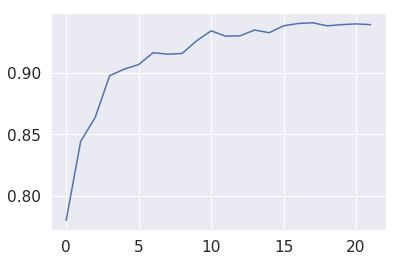

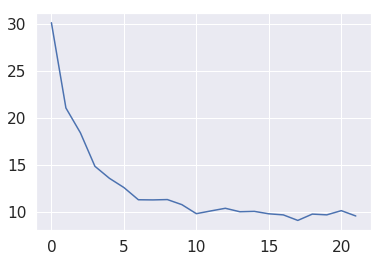


[22] accuracy: 0.939 loss: 9.561

runtime :  11515.227620601654
Train
[23, 00020] loss: 0.371 acc: 0.995
[23, 00040] loss: 0.786 acc: 0.994
[23, 00060] loss: 1.122 acc: 0.995
[23, 00080] loss: 1.440 acc: 0.995
[23, 00100] loss: 1.685 acc: 0.996
[23, 00120] loss: 1.990 acc: 0.996
[23, 00140] loss: 2.252 acc: 0.997
[23, 00160] loss: 2.613 acc: 0.996
[23, 00180] loss: 2.916 acc: 0.996
[23, 00200] loss: 3.268 acc: 0.996
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907, 9.32250141352415, 7.928083159029484, 7.6420090310275555, 6.46366000175476

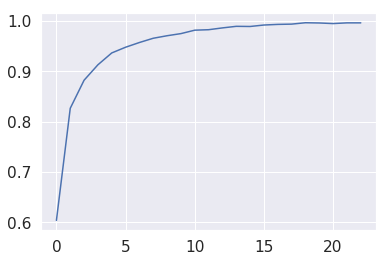

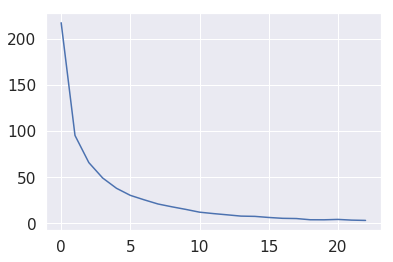

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405]


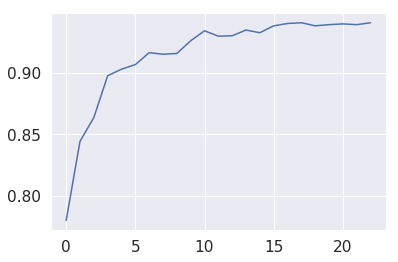

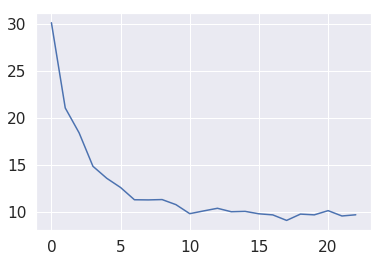


[23] accuracy: 0.941 loss: 9.690

runtime :  12036.538880109787
Train
[24, 00020] loss: 0.312 acc: 0.996
[24, 00040] loss: 0.616 acc: 0.996
[24, 00060] loss: 1.012 acc: 0.995
[24, 00080] loss: 1.316 acc: 0.996
[24, 00100] loss: 1.627 acc: 0.996
[24, 00120] loss: 1.929 acc: 0.996
[24, 00140] loss: 2.202 acc: 0.996
[24, 00160] loss: 2.526 acc: 0.996
[24, 00180] loss: 2.760 acc: 0.997
[24, 00200] loss: 3.052 acc: 0.997
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907, 9.32250141352415, 7.928083159029484, 7.6420090310275555, 6.4

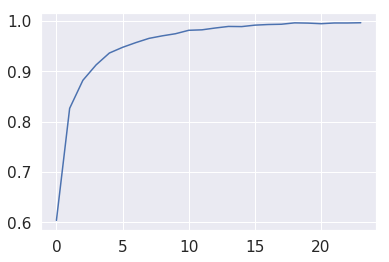

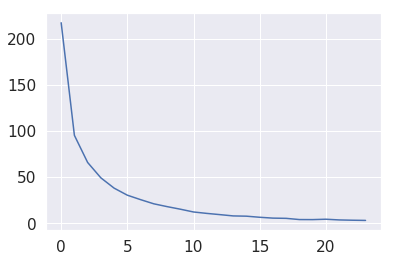

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243]


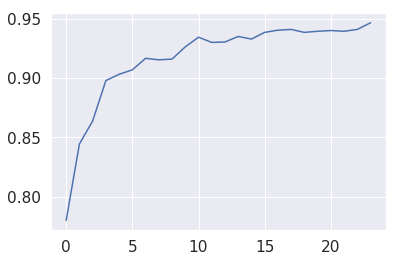

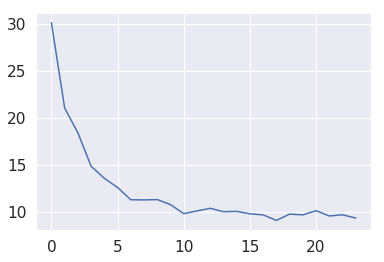


[24] accuracy: 0.947 loss: 9.336

runtime :  12563.040907144547
Train
[25, 00020] loss: 0.300 acc: 0.996
[25, 00040] loss: 0.554 acc: 0.996
[25, 00060] loss: 0.900 acc: 0.997
[25, 00080] loss: 1.141 acc: 0.997
[25, 00100] loss: 1.276 acc: 0.998
[25, 00120] loss: 1.600 acc: 0.998
[25, 00140] loss: 1.891 acc: 0.998
[25, 00160] loss: 2.081 acc: 0.998
[25, 00180] loss: 2.337 acc: 0.998
[25, 00200] loss: 2.638 acc: 0.997
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907, 9.32250141352415, 7.928083159029484, 7.642009031

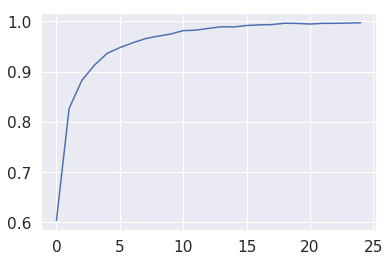

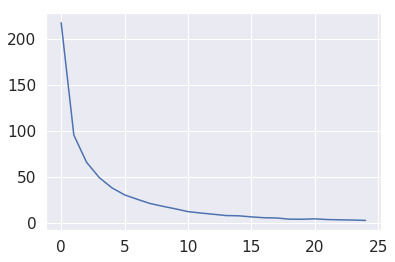

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331]


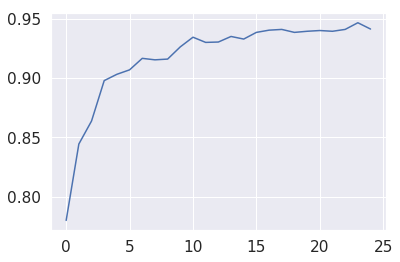

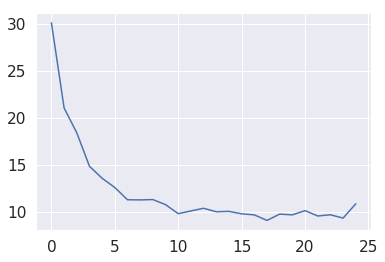


[25] accuracy: 0.941 loss: 10.858

runtime :  13088.066383838654
Train
[26, 00020] loss: 0.319 acc: 0.995
[26, 00040] loss: 0.583 acc: 0.996
[26, 00060] loss: 0.803 acc: 0.997
[26, 00080] loss: 1.038 acc: 0.997
[26, 00100] loss: 1.228 acc: 0.998
[26, 00120] loss: 1.475 acc: 0.997
[26, 00140] loss: 1.819 acc: 0.997
[26, 00160] loss: 2.152 acc: 0.997
[26, 00180] loss: 2.353 acc: 0.997
[26, 00200] loss: 2.638 acc: 0.997
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907, 9.32250141352415, 7.92808315902948

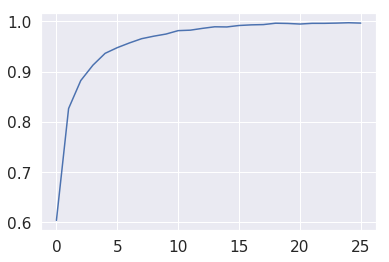

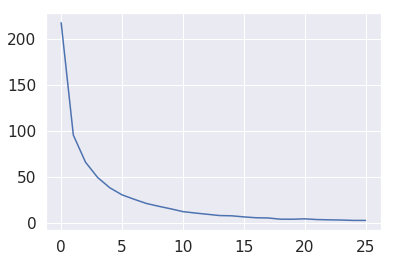

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951]


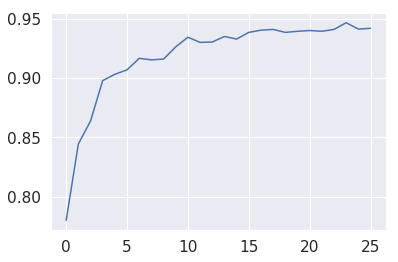

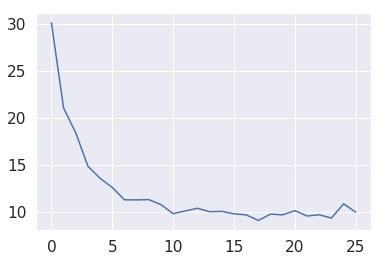


[26] accuracy: 0.942 loss: 9.967

runtime :  13613.37417459488
Train
[27, 00020] loss: 0.209 acc: 0.999
[27, 00040] loss: 0.435 acc: 0.998
[27, 00060] loss: 0.690 acc: 0.998
[27, 00080] loss: 0.939 acc: 0.998
[27, 00100] loss: 1.144 acc: 0.998
[27, 00120] loss: 1.372 acc: 0.998
[27, 00140] loss: 1.600 acc: 0.998
[27, 00160] loss: 1.795 acc: 0.998
[27, 00180] loss: 2.085 acc: 0.998
[27, 00200] loss: 2.300 acc: 0.998
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907, 9.32250141352415, 7.92808

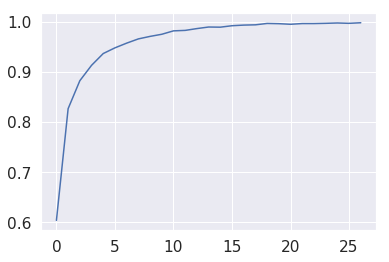

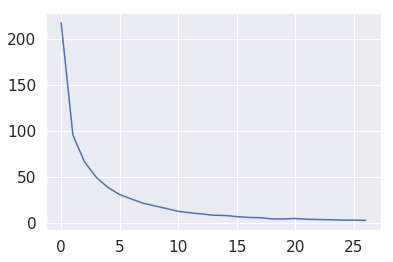

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454]


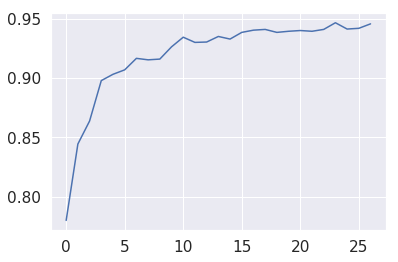

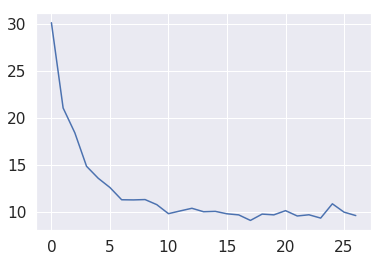


[27] accuracy: 0.946 loss: 9.604

runtime :  14140.285917043686
Train
[28, 00020] loss: 0.140 acc: 0.999
[28, 00040] loss: 0.287 acc: 0.999
[28, 00060] loss: 0.550 acc: 0.999
[28, 00080] loss: 0.741 acc: 0.999
[28, 00100] loss: 0.908 acc: 0.999
[28, 00120] loss: 1.146 acc: 0.999
[28, 00140] loss: 1.328 acc: 0.999
[28, 00160] loss: 1.565 acc: 0.998
[28, 00180] loss: 1.818 acc: 0.998
[28, 00200] loss: 2.030 acc: 0.998
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907, 9.322501413

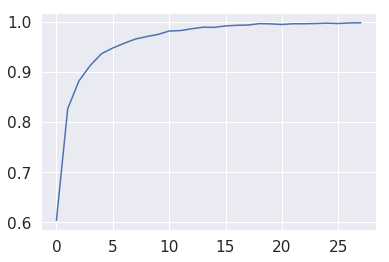

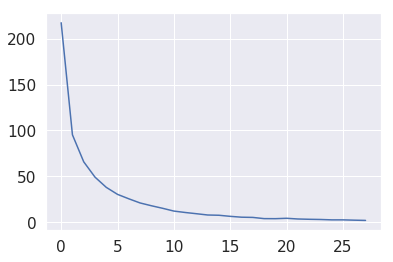

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432]


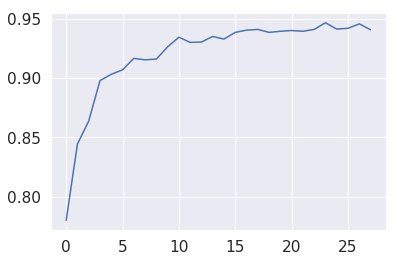

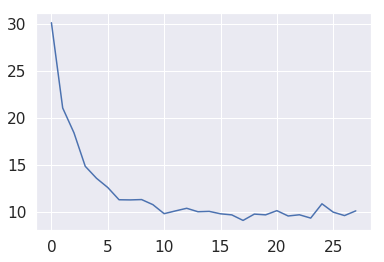


[28] accuracy: 0.941 loss: 10.107

runtime :  14664.258886814117
Train
[29, 00020] loss: 0.190 acc: 0.998
[29, 00040] loss: 0.493 acc: 0.997
[29, 00060] loss: 0.794 acc: 0.997
[29, 00080] loss: 0.977 acc: 0.997
[29, 00100] loss: 1.424 acc: 0.997
[29, 00120] loss: 1.650 acc: 0.997
[29, 00140] loss: 1.775 acc: 0.997
[29, 00160] loss: 1.931 acc: 0.997
[29, 00180] loss: 2.109 acc: 0.998
[29, 00200] loss: 2.314 acc: 0.998
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917859762907

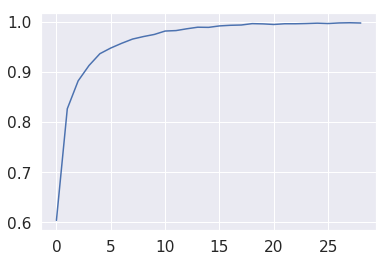

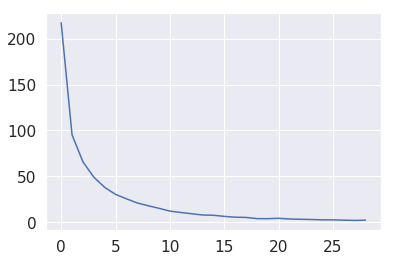

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432, 9.853908106684685]


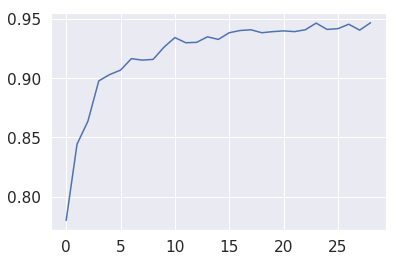

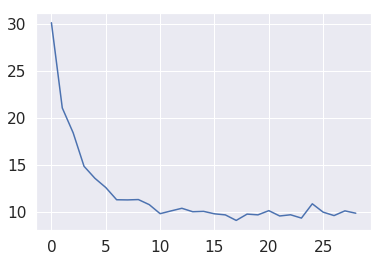


[29] accuracy: 0.947 loss: 9.854

runtime :  15190.083513259888
Train
[30, 00020] loss: 0.199 acc: 0.998
[30, 00040] loss: 0.343 acc: 0.998
[30, 00060] loss: 0.494 acc: 0.999
[30, 00080] loss: 0.721 acc: 0.998
[30, 00100] loss: 0.981 acc: 0.998
[30, 00120] loss: 1.167 acc: 0.998
[30, 00140] loss: 1.329 acc: 0.998
[30, 00160] loss: 1.498 acc: 0.998
[30, 00180] loss: 1.669 acc: 0.998
[30, 00200] loss: 1.943 acc: 0.998
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.20019954815507, 10.66917

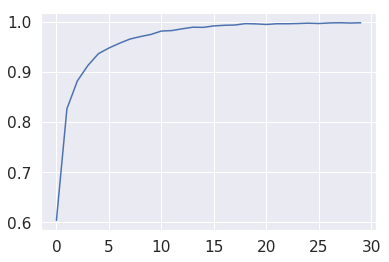

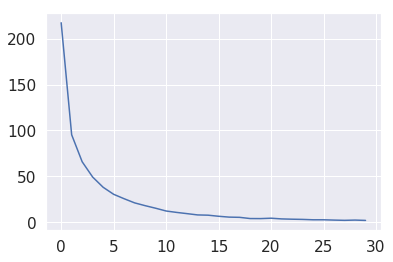

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432, 9.853908106684685, 9.508186969906092]


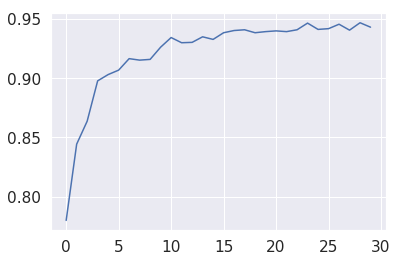

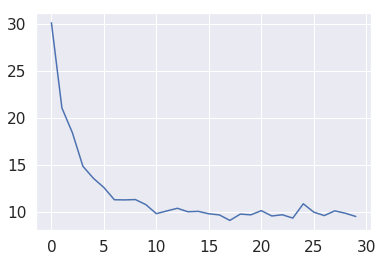


[30] accuracy: 0.943 loss: 9.508

runtime :  15713.932874441147
Train
[31, 00020] loss: 0.189 acc: 0.998
[31, 00040] loss: 0.367 acc: 0.997
[31, 00060] loss: 0.574 acc: 0.998
[31, 00080] loss: 0.712 acc: 0.998
[31, 00100] loss: 0.933 acc: 0.998
[31, 00120] loss: 1.194 acc: 0.998
[31, 00140] loss: 1.402 acc: 0.998
[31, 00160] loss: 1.645 acc: 0.998
[31, 00180] loss: 1.857 acc: 0.998
[31, 00200] loss: 2.085 acc: 0.998
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 12.200199548155

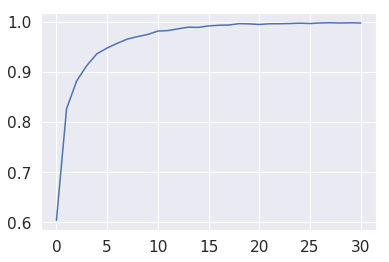

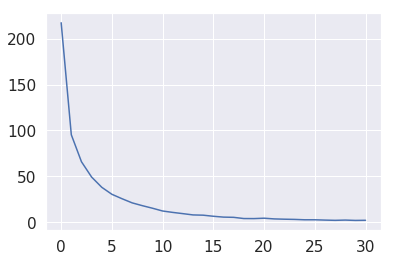

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432, 9.853908106684685, 9.508186969906092, 10.45566450804472]


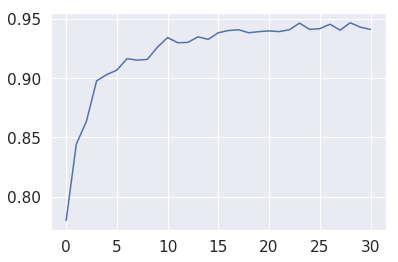

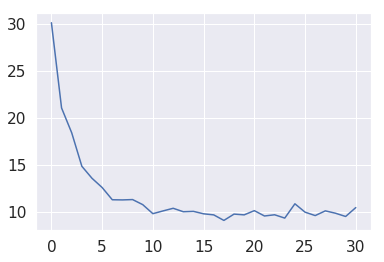


[31] accuracy: 0.941 loss: 10.456

runtime :  16245.473269939423
Train
[32, 00020] loss: 0.140 acc: 0.998
[32, 00040] loss: 0.310 acc: 0.998
[32, 00060] loss: 0.449 acc: 0.999
[32, 00080] loss: 0.567 acc: 0.999
[32, 00100] loss: 0.770 acc: 0.998
[32, 00120] loss: 0.985 acc: 0.998
[32, 00140] loss: 1.187 acc: 0.998
[32, 00160] loss: 1.377 acc: 0.998
[32, 00180] loss: 1.591 acc: 0.998
[32, 00200] loss: 1.913 acc: 0.998
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.226972438395023, 1

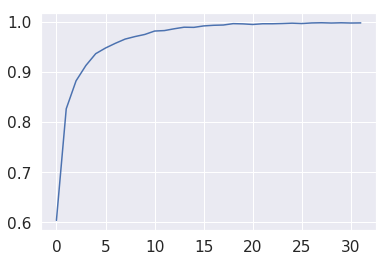

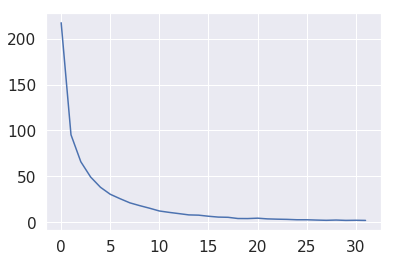

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432, 9.853908106684685, 9.508186969906092, 10.45566450804472, 9.526602424681187]


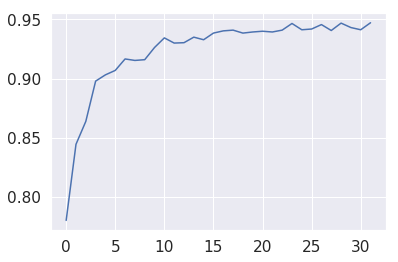

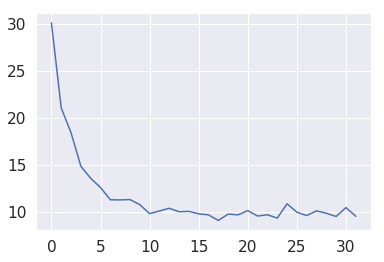


[32] accuracy: 0.947 loss: 9.527

runtime :  16769.906615257263
Train
[33, 00020] loss: 0.086 acc: 1.000
[33, 00040] loss: 0.298 acc: 0.998
[33, 00060] loss: 0.497 acc: 0.998
[33, 00080] loss: 0.712 acc: 0.998
[33, 00100] loss: 0.859 acc: 0.998
[33, 00120] loss: 0.967 acc: 0.998
[33, 00140] loss: 1.059 acc: 0.999
[33, 00160] loss: 1.216 acc: 0.999
[33, 00180] loss: 1.430 acc: 0.998
[33, 00200] loss: 1.591 acc: 0.998
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956, 15.22697243

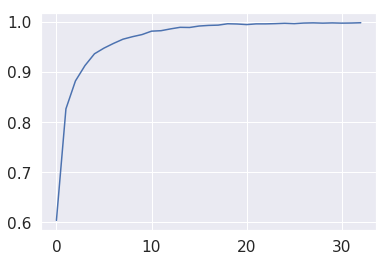

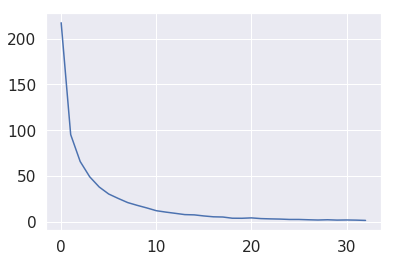

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432, 9.853908106684685, 9.508186969906092, 10.45566450804472, 9.526602424681187, 9.780528746545315]


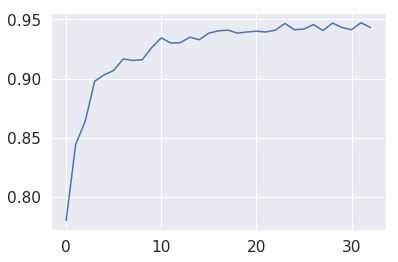

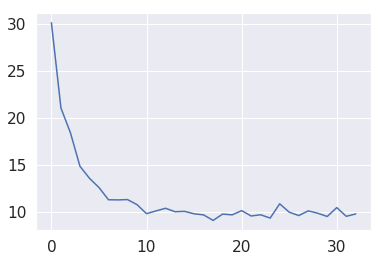


[33] accuracy: 0.943 loss: 9.781

runtime :  17298.584289073944
Train
[34, 00020] loss: 0.160 acc: 0.999
[34, 00040] loss: 0.331 acc: 0.998
[34, 00060] loss: 0.470 acc: 0.998
[34, 00080] loss: 0.625 acc: 0.998
[34, 00100] loss: 0.753 acc: 0.998
[34, 00120] loss: 0.915 acc: 0.999
[34, 00140] loss: 1.091 acc: 0.998
[34, 00160] loss: 1.289 acc: 0.998
[34, 00180] loss: 1.449 acc: 0.998
[34, 00200] loss: 1.570 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.01842314749956

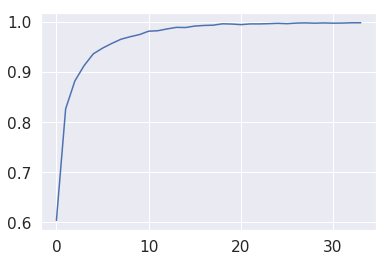

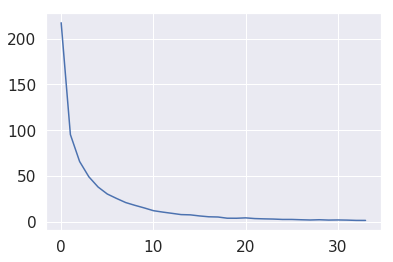

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432, 9.853908106684685, 9.508186969906092, 10.45566450804472, 9.526602424681187, 9.780528746545315, 10.79841627925

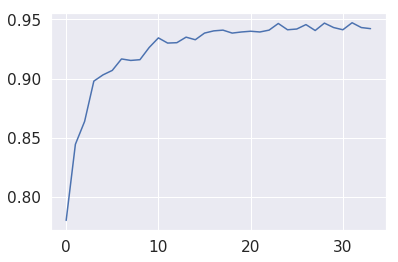

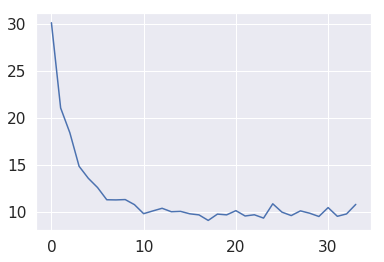


[34] accuracy: 0.942 loss: 10.798

runtime :  17824.431887865067
Train
[35, 00020] loss: 0.209 acc: 0.998
[35, 00040] loss: 0.359 acc: 0.998
[35, 00060] loss: 0.590 acc: 0.998
[35, 00080] loss: 0.712 acc: 0.998
[35, 00100] loss: 0.852 acc: 0.998
[35, 00120] loss: 0.985 acc: 0.999
[35, 00140] loss: 1.189 acc: 0.998
[35, 00160] loss: 1.336 acc: 0.998
[35, 00180] loss: 1.476 acc: 0.998
[35, 00200] loss: 1.680 acc: 0.998
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.051564641296864, 18.

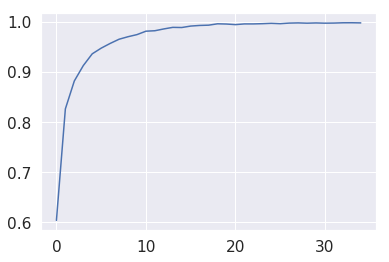

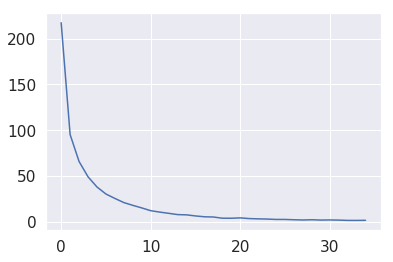

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432, 9.853908106684685, 9.508186969906092, 10.45566450804472, 9.526602424681187, 9.780528746545315, 10.7

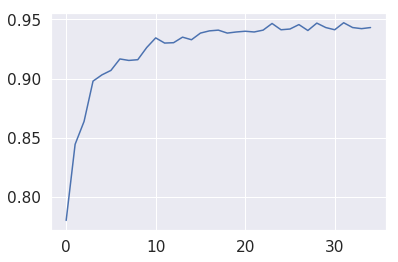

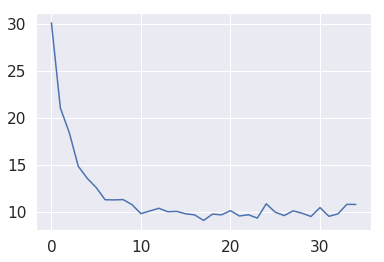


[35] accuracy: 0.943 loss: 10.789

runtime :  18349.781903505325
Train
[36, 00020] loss: 0.134 acc: 0.998
[36, 00040] loss: 0.239 acc: 0.999
[36, 00060] loss: 0.397 acc: 0.999
[36, 00080] loss: 0.525 acc: 0.999
[36, 00100] loss: 0.671 acc: 0.999
[36, 00120] loss: 0.792 acc: 0.999
[36, 00140] loss: 0.888 acc: 0.999
[36, 00160] loss: 1.004 acc: 0.999
[36, 00180] loss: 1.080 acc: 0.999
[36, 00200] loss: 1.173 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 21.0515646

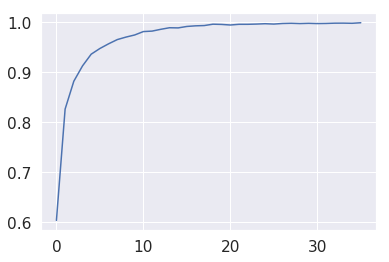

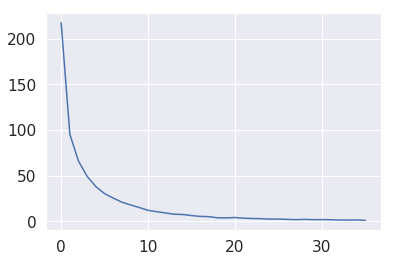

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432, 9.853908106684685, 9.508186969906092, 10.45566450804472, 9.526602424681187, 9.780528746545

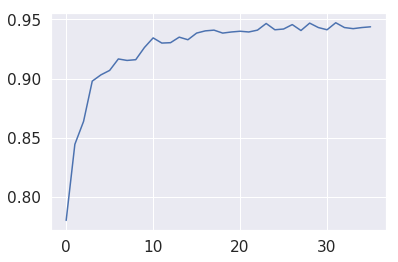

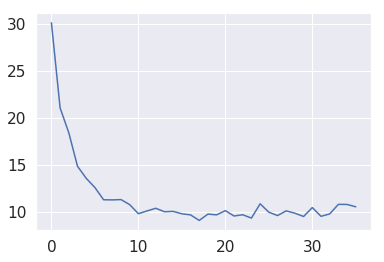


[36] accuracy: 0.944 loss: 10.538

runtime :  18875.025826931
Train
[37, 00020] loss: 0.084 acc: 1.000
[37, 00040] loss: 0.206 acc: 1.000
[37, 00060] loss: 0.318 acc: 1.000
[37, 00080] loss: 0.403 acc: 1.000
[37, 00100] loss: 0.493 acc: 1.000
[37, 00120] loss: 0.602 acc: 1.000
[37, 00140] loss: 0.695 acc: 1.000
[37, 00160] loss: 0.812 acc: 1.000
[37, 00180] loss: 0.931 acc: 0.999
[37, 00200] loss: 1.078 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.56813433766365, 

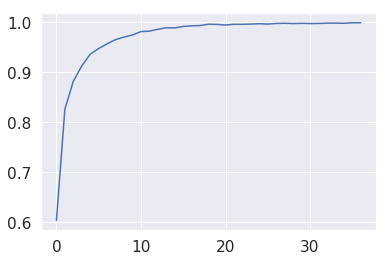

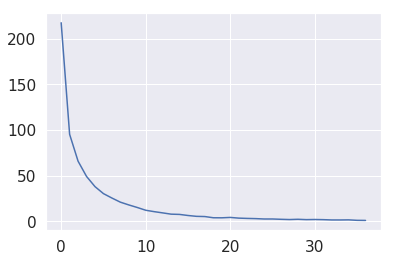

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432, 9.853908106684685, 9.508186969906092, 10.45566450804472, 9.526602424681187, 9.7

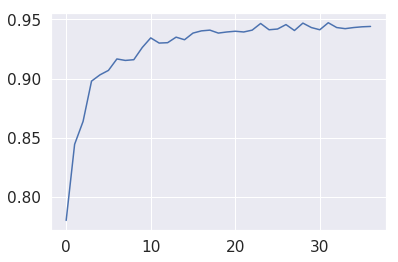

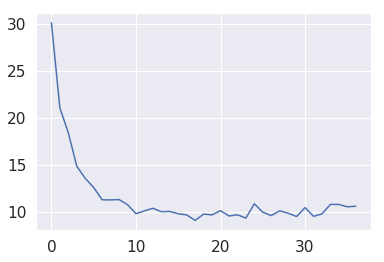


[37] accuracy: 0.944 loss: 10.595

runtime :  19399.091846704483
Train
[38, 00020] loss: 0.127 acc: 0.999
[38, 00040] loss: 0.237 acc: 0.999
[38, 00060] loss: 0.399 acc: 0.999
[38, 00080] loss: 0.574 acc: 0.999
[38, 00100] loss: 0.789 acc: 0.998
[38, 00120] loss: 0.944 acc: 0.998
[38, 00140] loss: 1.152 acc: 0.998
[38, 00160] loss: 1.265 acc: 0.998
[38, 00180] loss: 1.383 acc: 0.998
[38, 00200] loss: 1.490 acc: 0.998
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.393792554736137, 25.

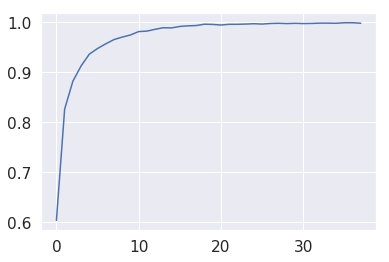

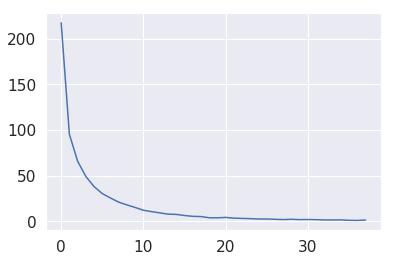

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432, 9.853908106684685, 9.508186969906092, 10.45566450804472, 9.526602424

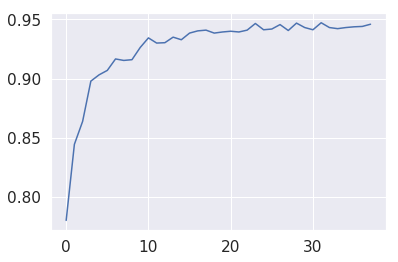

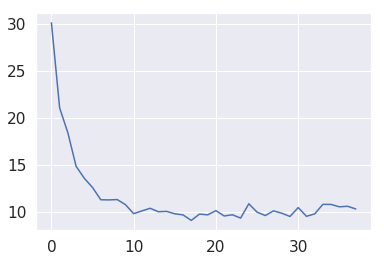


[38] accuracy: 0.946 loss: 10.309

runtime :  19924.525860786438
Train
[39, 00020] loss: 0.137 acc: 0.999
[39, 00040] loss: 0.204 acc: 1.000
[39, 00060] loss: 0.326 acc: 0.999
[39, 00080] loss: 0.454 acc: 0.999
[39, 00100] loss: 0.659 acc: 0.999
[39, 00120] loss: 0.880 acc: 0.998
[39, 00140] loss: 0.994 acc: 0.998
[39, 00160] loss: 1.077 acc: 0.998
[39, 00180] loss: 1.221 acc: 0.998
[39, 00200] loss: 1.423 acc: 0.998
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30.3937925547

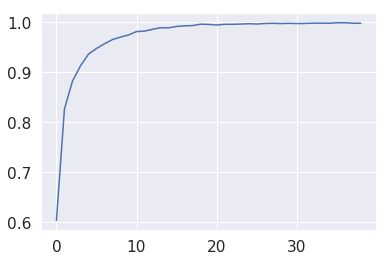

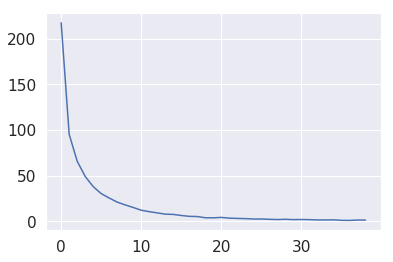

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432, 9.853908106684685, 9.508186969906092, 10.45566450804472, 

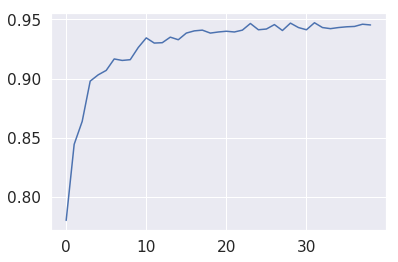

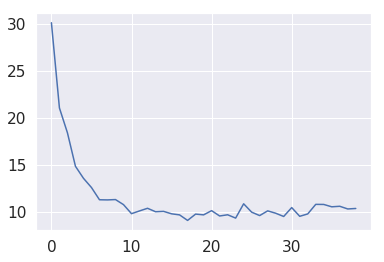


[39] accuracy: 0.945 loss: 10.361

runtime :  20453.354541301727
Train
[40, 00020] loss: 0.140 acc: 0.999
[40, 00040] loss: 0.226 acc: 1.000
[40, 00060] loss: 0.431 acc: 0.999
[40, 00080] loss: 0.530 acc: 0.999
[40, 00100] loss: 0.618 acc: 0.999
[40, 00120] loss: 0.755 acc: 0.999
[40, 00140] loss: 0.887 acc: 0.999
[40, 00160] loss: 0.997 acc: 0.999
[40, 00180] loss: 1.119 acc: 0.999
[40, 00200] loss: 1.234 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.04560489580035, 30

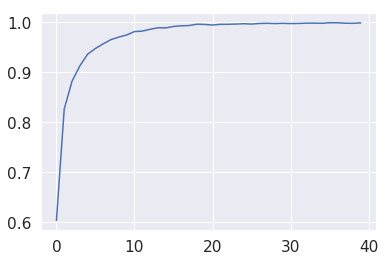

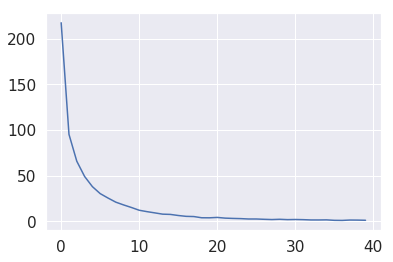

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432, 9.853908106684685, 9.508186969906092, 10.45566

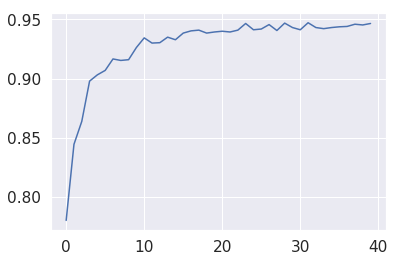

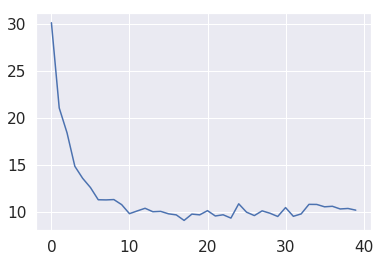


[40] accuracy: 0.947 loss: 10.180

runtime :  20981.03211259842
Train
[41, 00020] loss: 0.144 acc: 0.997
[41, 00040] loss: 0.277 acc: 0.998
[41, 00060] loss: 0.381 acc: 0.998
[41, 00080] loss: 0.469 acc: 0.999
[41, 00100] loss: 0.615 acc: 0.999
[41, 00120] loss: 0.758 acc: 0.999
[41, 00140] loss: 0.940 acc: 0.998
[41, 00160] loss: 1.025 acc: 0.999
[41, 00180] loss: 1.137 acc: 0.999
[41, 00200] loss: 1.211 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 38.0456048958

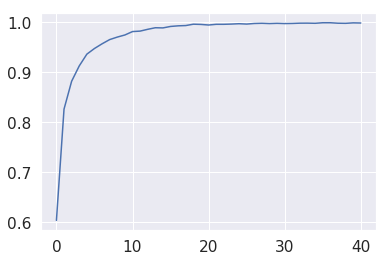

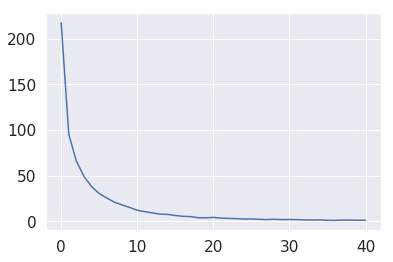

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432, 9.853908106684685, 9.50818696990609

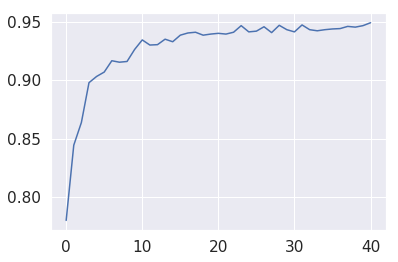

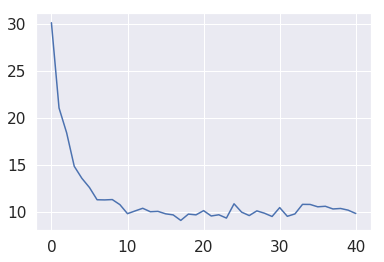


[41] accuracy: 0.949 loss: 9.825

runtime :  21509.766841173172
Train
[42, 00020] loss: 0.063 acc: 1.000
[42, 00040] loss: 0.183 acc: 0.999
[42, 00060] loss: 0.273 acc: 0.999
[42, 00080] loss: 0.354 acc: 0.999
[42, 00100] loss: 0.449 acc: 1.000
[42, 00120] loss: 0.552 acc: 0.999
[42, 00140] loss: 0.619 acc: 1.000
[42, 00160] loss: 0.785 acc: 0.999
[42, 00180] loss: 0.899 acc: 0.999
[42, 00200] loss: 0.972 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.19630239158869, 3

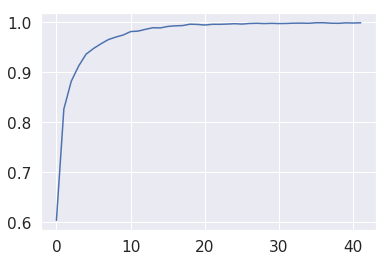

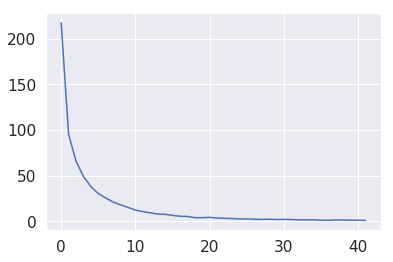

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432, 9.853908106684685, 9.508

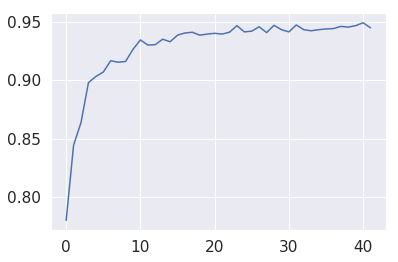

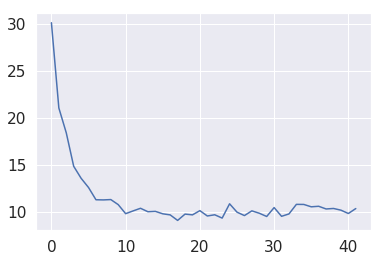


[42] accuracy: 0.945 loss: 10.352

runtime :  22032.877977609634
Train
[43, 00020] loss: 0.054 acc: 1.000
[43, 00040] loss: 0.191 acc: 0.998
[43, 00060] loss: 0.369 acc: 0.998
[43, 00080] loss: 0.473 acc: 0.998
[43, 00100] loss: 0.603 acc: 0.998
[43, 00120] loss: 0.743 acc: 0.998
[43, 00140] loss: 0.831 acc: 0.998
[43, 00160] loss: 0.944 acc: 0.998
[43, 00180] loss: 1.023 acc: 0.999
[43, 00200] loss: 1.109 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375]
[217.3159637451172, 95.257428586483, 65.86597684025764, 49.1963

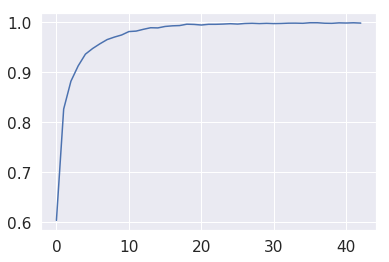

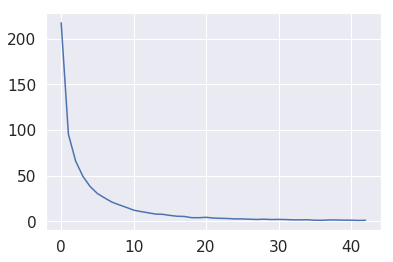

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432, 9.85390810668468

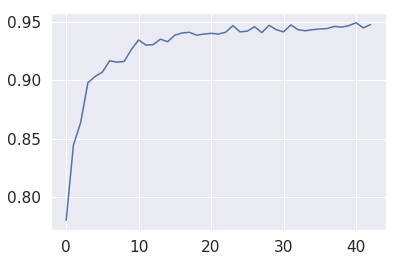

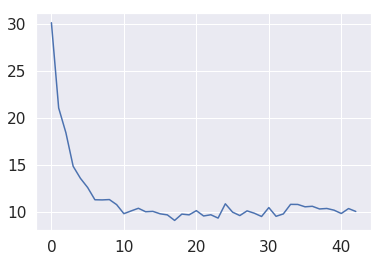


[43] accuracy: 0.948 loss: 10.044

runtime :  22559.666703224182
Train
[44, 00020] loss: 0.131 acc: 0.998
[44, 00040] loss: 0.304 acc: 0.998
[44, 00060] loss: 0.420 acc: 0.998
[44, 00080] loss: 0.522 acc: 0.998
[44, 00100] loss: 0.631 acc: 0.999
[44, 00120] loss: 0.706 acc: 0.999
[44, 00140] loss: 0.784 acc: 0.999
[44, 00160] loss: 0.845 acc: 0.999
[44, 00180] loss: 0.944 acc: 0.999
[44, 00200] loss: 1.051 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625]
[217.3159637451172, 95.257428586483, 65.86597684025

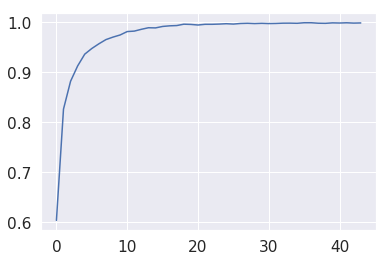

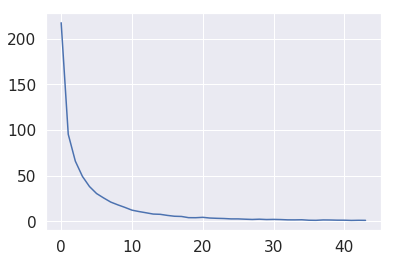

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106538072228432, 9.853

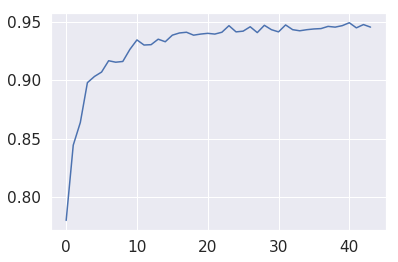

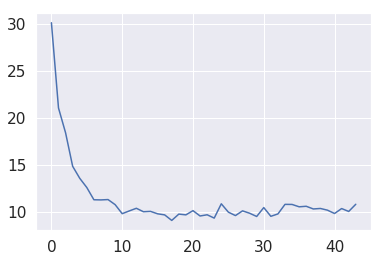


[44] accuracy: 0.945 loss: 10.810

runtime :  23083.288845300674
Train
[45, 00020] loss: 0.045 acc: 1.000
[45, 00040] loss: 0.188 acc: 1.000
[45, 00060] loss: 0.289 acc: 0.999
[45, 00080] loss: 0.394 acc: 0.999
[45, 00100] loss: 0.463 acc: 1.000
[45, 00120] loss: 0.549 acc: 0.999
[45, 00140] loss: 0.633 acc: 0.999
[45, 00160] loss: 0.815 acc: 0.999
[45, 00180] loss: 0.883 acc: 0.999
[45, 00200] loss: 1.006 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875]
[217.3159637451172, 95.257428586483, 65.86

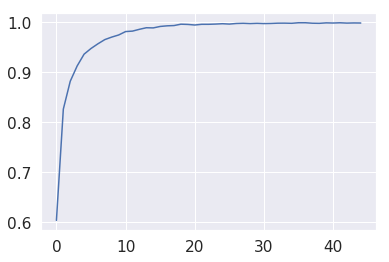

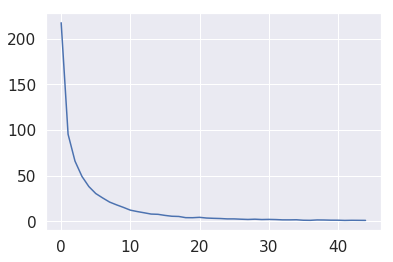

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.10653807222843

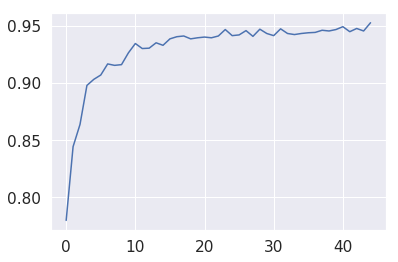

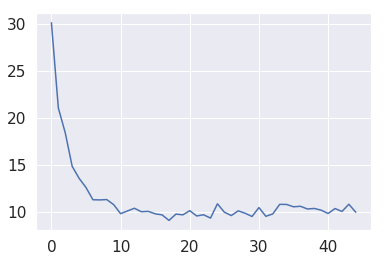


[45] accuracy: 0.953 loss: 9.962

runtime :  23610.74838900566
Train
[46, 00020] loss: 0.084 acc: 0.999
[46, 00040] loss: 0.168 acc: 0.999
[46, 00060] loss: 0.267 acc: 0.999
[46, 00080] loss: 0.331 acc: 0.999
[46, 00100] loss: 0.398 acc: 0.999
[46, 00120] loss: 0.450 acc: 0.999
[46, 00140] loss: 0.545 acc: 0.999
[46, 00160] loss: 0.647 acc: 0.999
[46, 00180] loss: 0.706 acc: 0.999
[46, 00200] loss: 0.780 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125]
[217.3159637451172, 95.257428586

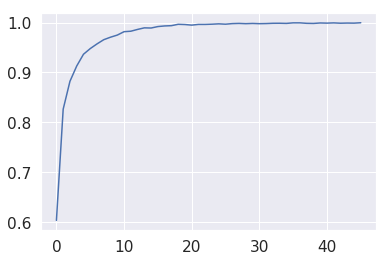

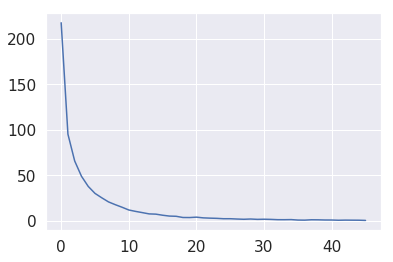

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007454, 10.106

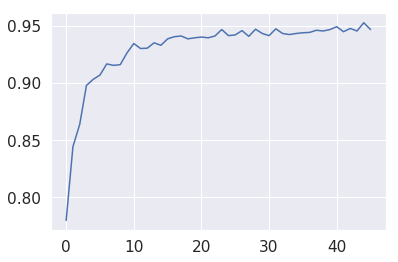

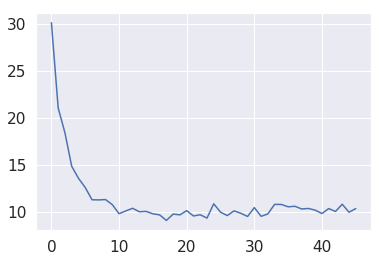


[46] accuracy: 0.947 loss: 10.350

runtime :  24138.48019361496
Train
[47, 00020] loss: 0.074 acc: 1.000
[47, 00040] loss: 0.161 acc: 1.000
[47, 00060] loss: 0.217 acc: 1.000
[47, 00080] loss: 0.326 acc: 1.000
[47, 00100] loss: 0.466 acc: 1.000
[47, 00120] loss: 0.517 acc: 1.000
[47, 00140] loss: 0.607 acc: 1.000
[47, 00160] loss: 0.779 acc: 0.999
[47, 00180] loss: 0.845 acc: 0.999
[47, 00200] loss: 0.946 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875]
[217.3159637451172

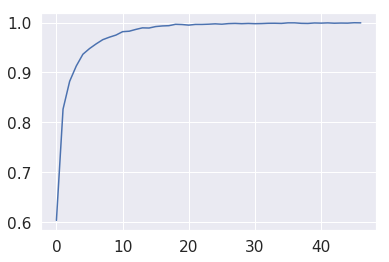

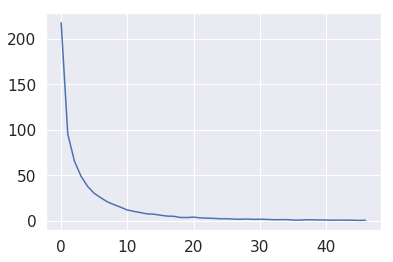

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.604476884007

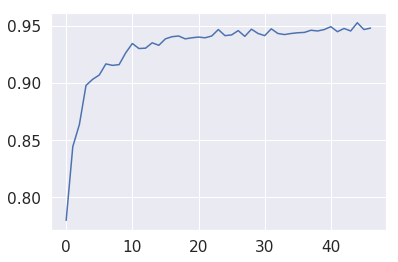

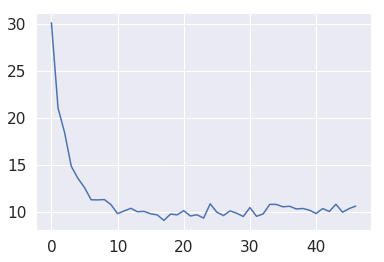


[47] accuracy: 0.948 loss: 10.614

runtime :  24666.708035707474
Train
[48, 00020] loss: 0.057 acc: 1.000
[48, 00040] loss: 0.189 acc: 0.999
[48, 00060] loss: 0.318 acc: 0.999
[48, 00080] loss: 0.389 acc: 0.999
[48, 00100] loss: 0.479 acc: 0.999
[48, 00120] loss: 0.521 acc: 0.999
[48, 00140] loss: 0.607 acc: 0.999
[48, 00160] loss: 0.681 acc: 1.000
[48, 00180] loss: 0.751 acc: 1.000
[48, 00200] loss: 0.845 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125]
[217

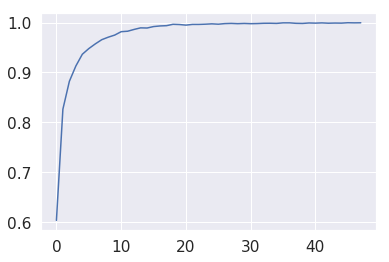

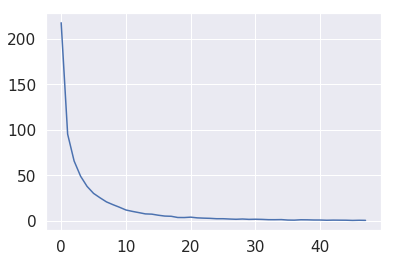

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.967407245188951, 9.6

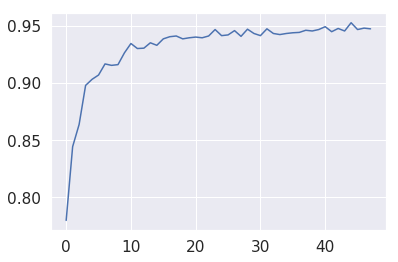

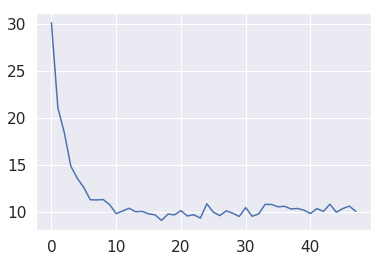


[48] accuracy: 0.947 loss: 10.062

runtime :  25194.688372135162
Train
[49, 00020] loss: 0.063 acc: 1.000
[49, 00040] loss: 0.131 acc: 1.000
[49, 00060] loss: 0.272 acc: 0.999
[49, 00080] loss: 0.315 acc: 1.000
[49, 00100] loss: 0.380 acc: 1.000
[49, 00120] loss: 0.472 acc: 0.999
[49, 00140] loss: 0.577 acc: 0.999
[49, 00160] loss: 0.632 acc: 1.000
[49, 00180] loss: 0.766 acc: 0.999
[49, 00200] loss: 0.905 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.99

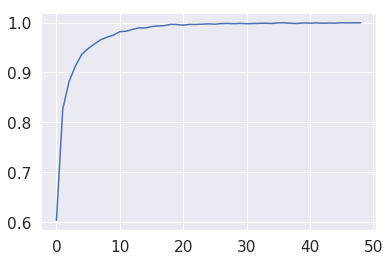

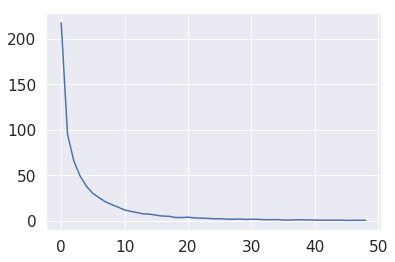

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.96740724518

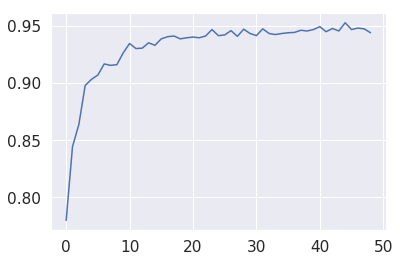

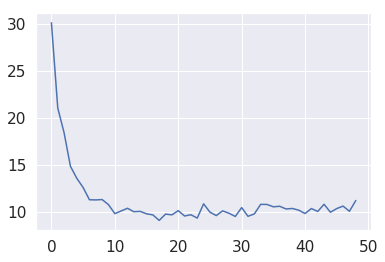


[49] accuracy: 0.944 loss: 11.207

runtime :  25724.99784874916
Train
[50, 00020] loss: 0.069 acc: 1.000
[50, 00040] loss: 0.159 acc: 1.000
[50, 00060] loss: 0.204 acc: 1.000
[50, 00080] loss: 0.256 acc: 1.000
[50, 00100] loss: 0.308 acc: 1.000
[50, 00120] loss: 0.342 acc: 1.000
[50, 00140] loss: 0.429 acc: 1.000
[50, 00160] loss: 0.498 acc: 1.000
[50, 00180] loss: 0.652 acc: 1.000
[50, 00200] loss: 0.795 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

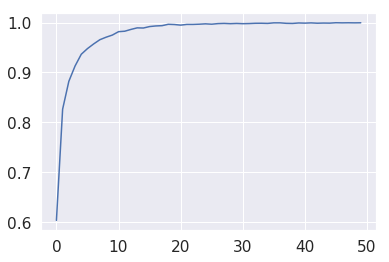

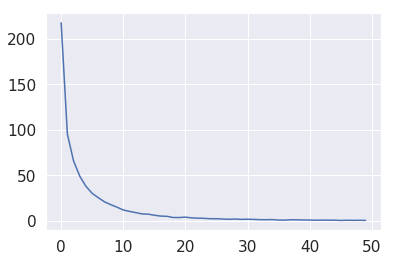

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578123331, 9.

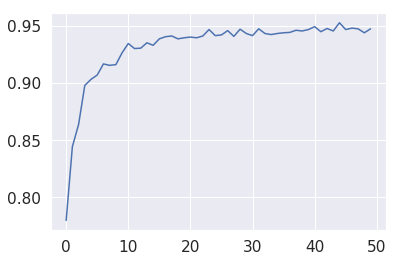

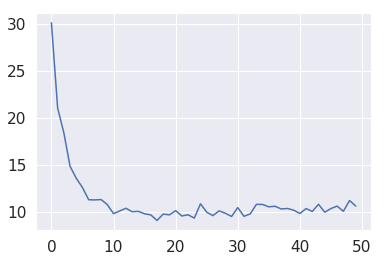


[50] accuracy: 0.947 loss: 10.612

runtime :  26254.130217075348
Train
[51, 00020] loss: 0.091 acc: 0.998
[51, 00040] loss: 0.123 acc: 0.999
[51, 00060] loss: 0.169 acc: 0.999
[51, 00080] loss: 0.235 acc: 1.000
[51, 00100] loss: 0.307 acc: 1.000
[51, 00120] loss: 0.380 acc: 1.000
[51, 00140] loss: 0.503 acc: 0.999
[51, 00160] loss: 0.586 acc: 0.999
[51, 00180] loss: 0.677 acc: 0.999
[51, 00200] loss: 0.772 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.99

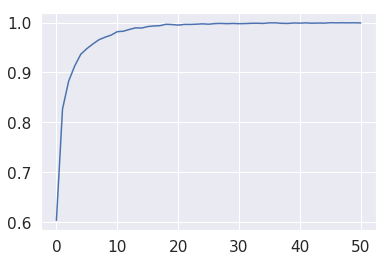

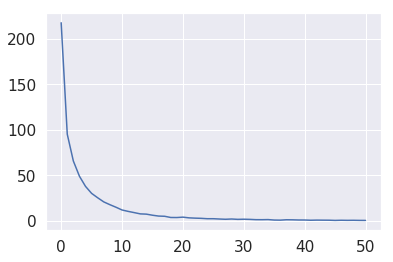

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85825578

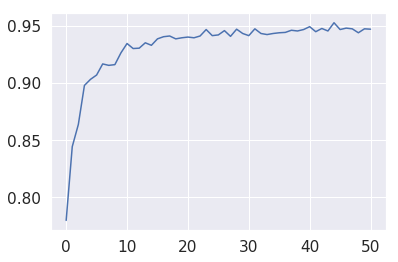

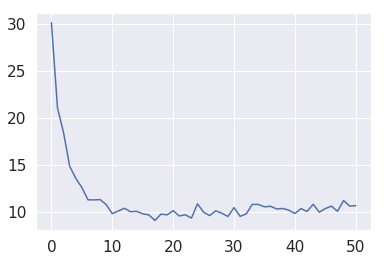


[51] accuracy: 0.947 loss: 10.663

runtime :  26784.359516859055
Train
[52, 00020] loss: 0.082 acc: 0.998
[52, 00040] loss: 0.159 acc: 0.999
[52, 00060] loss: 0.203 acc: 0.999
[52, 00080] loss: 0.274 acc: 0.999
[52, 00100] loss: 0.345 acc: 0.999
[52, 00120] loss: 0.408 acc: 0.999
[52, 00140] loss: 0.473 acc: 0.999
[52, 00160] loss: 0.530 acc: 1.000
[52, 00180] loss: 0.604 acc: 1.000
[52, 00200] loss: 0.666 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.99

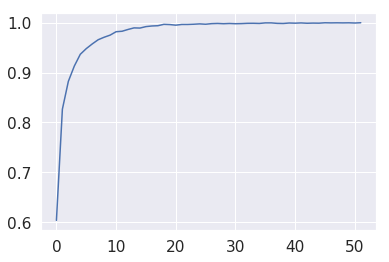

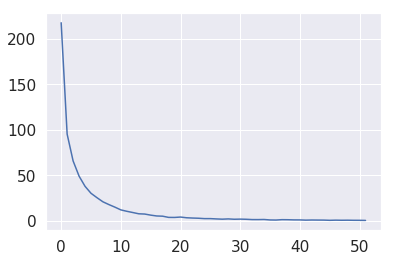

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.336453028023243, 10.85

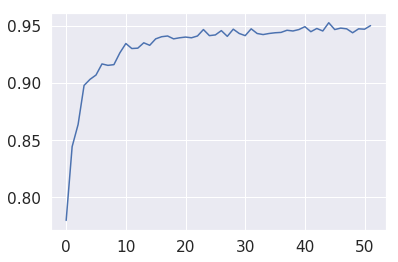

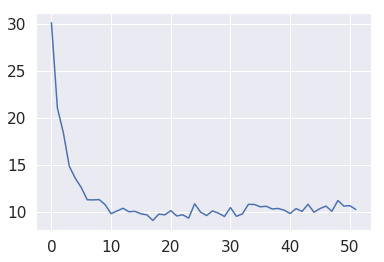


[52] accuracy: 0.950 loss: 10.252

runtime :  27316.14812850952
Train
[53, 00020] loss: 0.123 acc: 0.998
[53, 00040] loss: 0.187 acc: 0.998
[53, 00060] loss: 0.278 acc: 0.999
[53, 00080] loss: 0.350 acc: 0.999
[53, 00100] loss: 0.409 acc: 0.999
[53, 00120] loss: 0.498 acc: 0.999
[53, 00140] loss: 0.653 acc: 0.999
[53, 00160] loss: 0.753 acc: 0.999
[53, 00180] loss: 0.876 acc: 0.999
[53, 00200] loss: 0.941 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

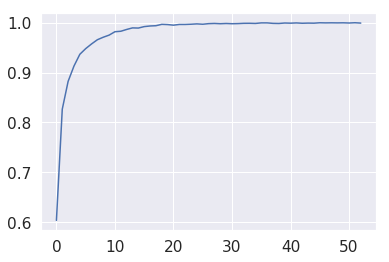

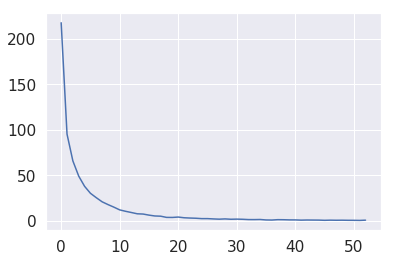

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.33645302802

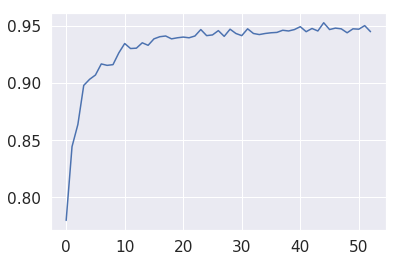

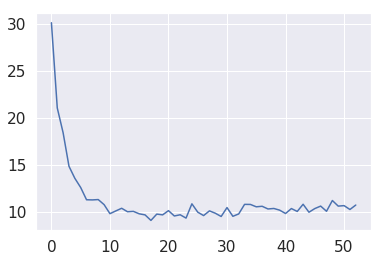


[53] accuracy: 0.945 loss: 10.725

runtime :  27845.08297944069
Train
[54, 00020] loss: 0.075 acc: 1.000
[54, 00040] loss: 0.131 acc: 1.000
[54, 00060] loss: 0.217 acc: 0.999
[54, 00080] loss: 0.272 acc: 1.000
[54, 00100] loss: 0.331 acc: 1.000
[54, 00120] loss: 0.410 acc: 1.000
[54, 00140] loss: 0.482 acc: 1.000
[54, 00160] loss: 0.620 acc: 0.999
[54, 00180] loss: 0.769 acc: 0.999
[54, 00200] loss: 0.908 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

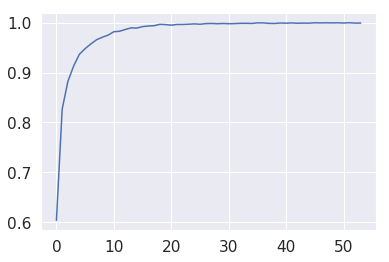

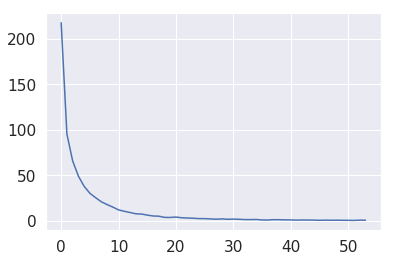

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374405, 9.33

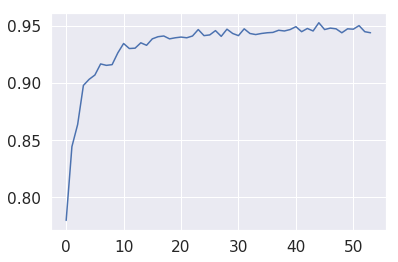

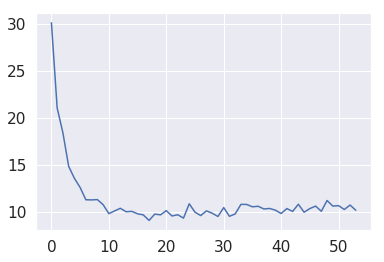


[54] accuracy: 0.944 loss: 10.175

runtime :  28370.615255117416
Train
[55, 00020] loss: 0.066 acc: 0.999
[55, 00040] loss: 0.180 acc: 0.999
[55, 00060] loss: 0.232 acc: 0.999
[55, 00080] loss: 0.286 acc: 0.999
[55, 00100] loss: 0.347 acc: 1.000
[55, 00120] loss: 0.421 acc: 0.999
[55, 00140] loss: 0.498 acc: 0.999
[55, 00160] loss: 0.557 acc: 0.999
[55, 00180] loss: 0.608 acc: 0.999
[55, 00200] loss: 0.658 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.99

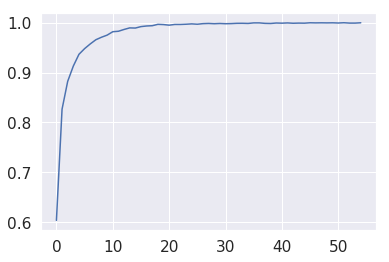

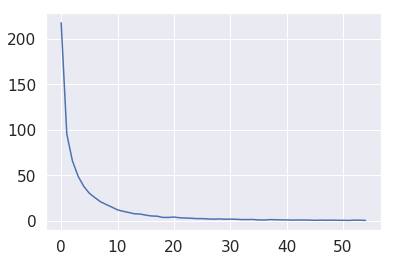

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.689540058374

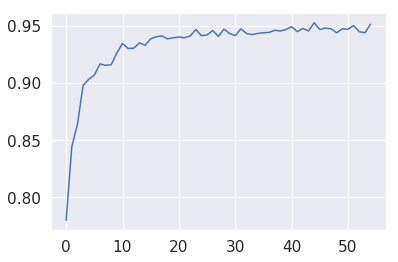

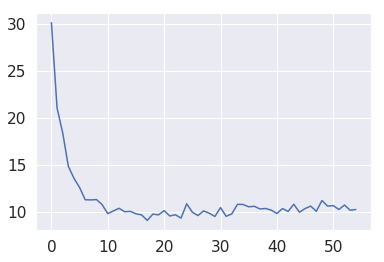


[55] accuracy: 0.951 loss: 10.250

runtime :  28900.860711097717
Train
[56, 00020] loss: 0.062 acc: 1.000
[56, 00040] loss: 0.106 acc: 1.000
[56, 00060] loss: 0.141 acc: 1.000
[56, 00080] loss: 0.207 acc: 1.000
[56, 00100] loss: 0.304 acc: 1.000
[56, 00120] loss: 0.357 acc: 1.000
[56, 00140] loss: 0.414 acc: 1.000
[56, 00160] loss: 0.505 acc: 1.000
[56, 00180] loss: 0.563 acc: 1.000
[56, 00200] loss: 0.603 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.99

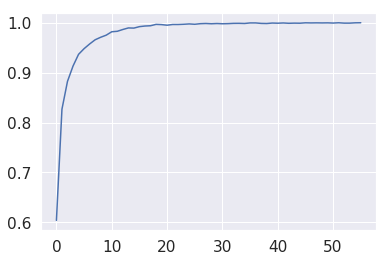

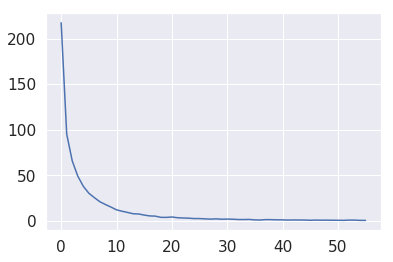

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175267696, 9.6

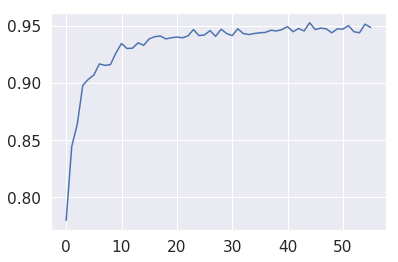

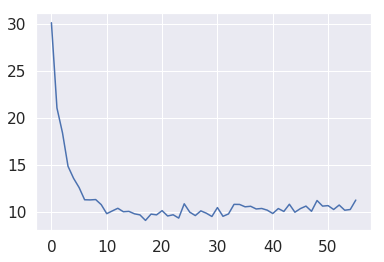


[56] accuracy: 0.948 loss: 11.255

runtime :  29429.94418001175
Train
[57, 00020] loss: 0.083 acc: 0.999
[57, 00040] loss: 0.150 acc: 0.999
[57, 00060] loss: 0.181 acc: 0.999
[57, 00080] loss: 0.212 acc: 1.000
[57, 00100] loss: 0.264 acc: 1.000
[57, 00120] loss: 0.345 acc: 1.000
[57, 00140] loss: 0.404 acc: 1.000
[57, 00160] loss: 0.463 acc: 1.000
[57, 00180] loss: 0.500 acc: 1.000
[57, 00200] loss: 0.565 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

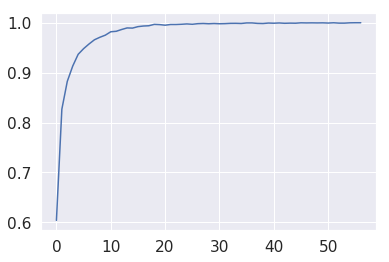

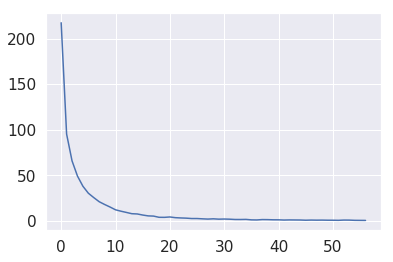

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.561331175

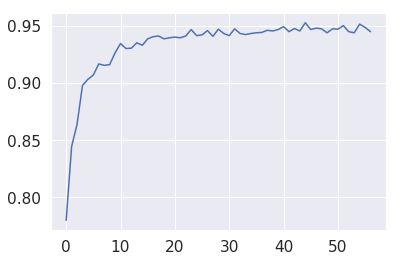

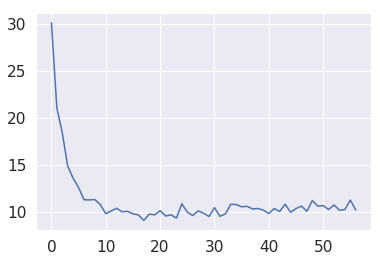


[57] accuracy: 0.945 loss: 10.191

runtime :  29961.904715538025
Train
[58, 00020] loss: 0.028 acc: 1.000
[58, 00040] loss: 0.070 acc: 1.000
[58, 00060] loss: 0.131 acc: 1.000
[58, 00080] loss: 0.221 acc: 1.000
[58, 00100] loss: 0.332 acc: 1.000
[58, 00120] loss: 0.467 acc: 0.999
[58, 00140] loss: 0.506 acc: 1.000
[58, 00160] loss: 0.603 acc: 1.000
[58, 00180] loss: 0.652 acc: 1.000
[58, 00200] loss: 0.697 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.99

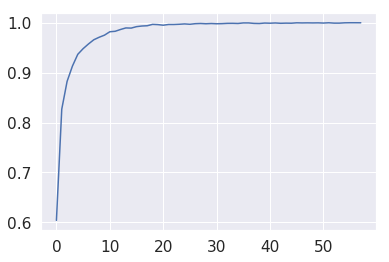

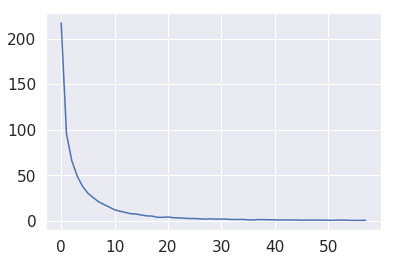

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.128398261964321, 9.5

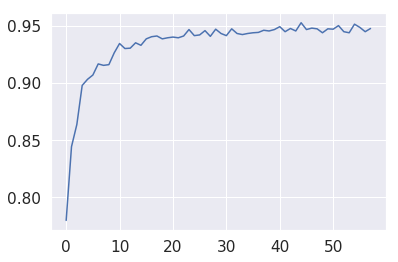

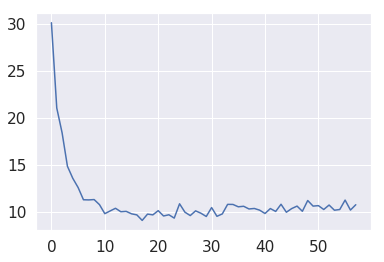


[58] accuracy: 0.948 loss: 10.760

runtime :  30488.06190919876
Train
[59, 00020] loss: 0.063 acc: 0.999
[59, 00040] loss: 0.119 acc: 1.000
[59, 00060] loss: 0.196 acc: 0.999
[59, 00080] loss: 0.227 acc: 1.000
[59, 00100] loss: 0.286 acc: 1.000
[59, 00120] loss: 0.372 acc: 0.999
[59, 00140] loss: 0.463 acc: 0.999
[59, 00160] loss: 0.503 acc: 0.999
[59, 00180] loss: 0.535 acc: 0.999
[59, 00200] loss: 0.587 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

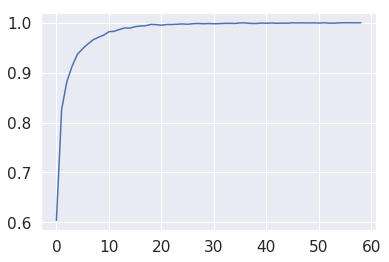

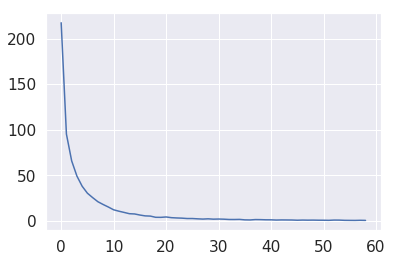

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.1283982619

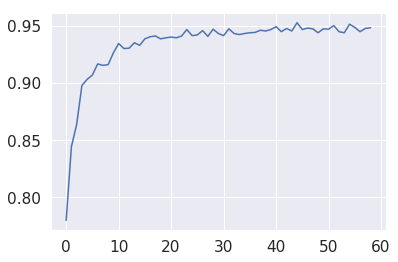

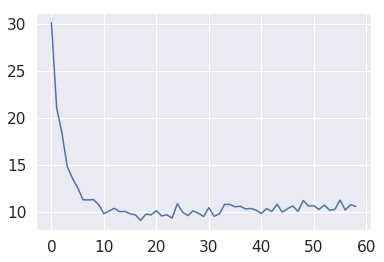


[59] accuracy: 0.948 loss: 10.579

runtime :  31016.41568684578
Train
[60, 00020] loss: 0.062 acc: 1.000
[60, 00040] loss: 0.145 acc: 1.000
[60, 00060] loss: 0.176 acc: 1.000
[60, 00080] loss: 0.239 acc: 1.000
[60, 00100] loss: 0.324 acc: 1.000
[60, 00120] loss: 0.365 acc: 1.000
[60, 00140] loss: 0.429 acc: 1.000
[60, 00160] loss: 0.463 acc: 1.000
[60, 00180] loss: 0.501 acc: 1.000
[60, 00200] loss: 0.543 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

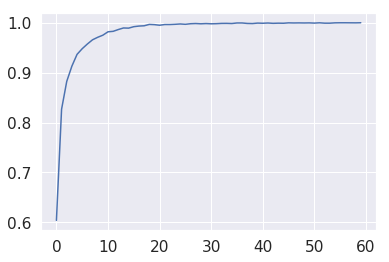

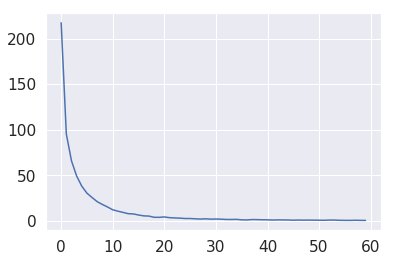

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449, 10.1283

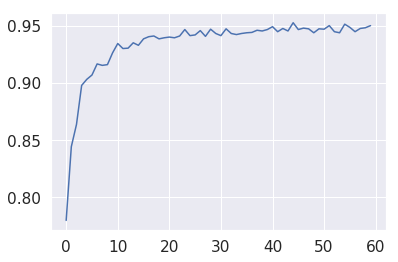

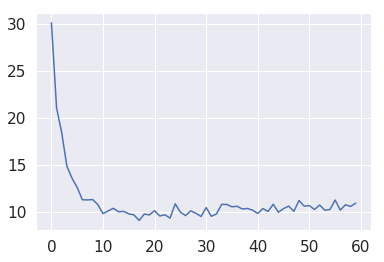


[60] accuracy: 0.950 loss: 10.929

runtime :  31544.07373189926
Train
[61, 00020] loss: 0.070 acc: 0.999
[61, 00040] loss: 0.177 acc: 0.998
[61, 00060] loss: 0.247 acc: 0.999
[61, 00080] loss: 0.315 acc: 0.999
[61, 00100] loss: 0.367 acc: 0.999
[61, 00120] loss: 0.440 acc: 0.999
[61, 00140] loss: 0.505 acc: 0.999
[61, 00160] loss: 0.533 acc: 0.999
[61, 00180] loss: 0.573 acc: 0.999
[61, 00200] loss: 0.594 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

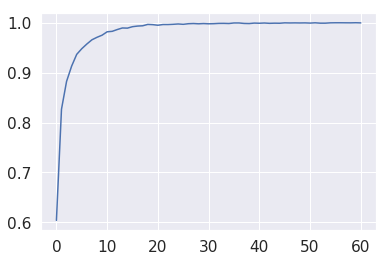

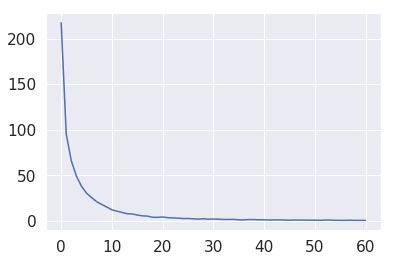

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.681307226419449

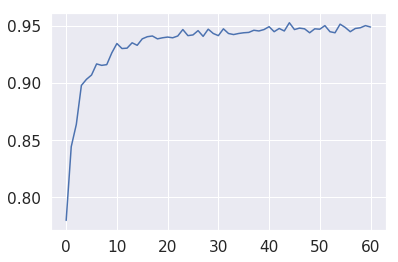

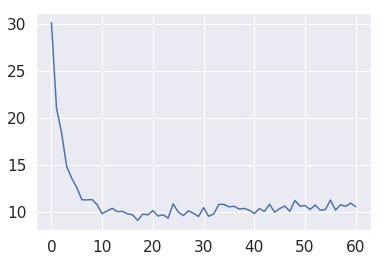


[61] accuracy: 0.949 loss: 10.544

runtime :  32076.823603391647
Train
[62, 00020] loss: 0.043 acc: 1.000
[62, 00040] loss: 0.090 acc: 1.000
[62, 00060] loss: 0.215 acc: 0.999
[62, 00080] loss: 0.293 acc: 0.999
[62, 00100] loss: 0.328 acc: 0.999
[62, 00120] loss: 0.368 acc: 0.999
[62, 00140] loss: 0.392 acc: 0.999
[62, 00160] loss: 0.479 acc: 0.999
[62, 00180] loss: 0.536 acc: 0.999
[62, 00200] loss: 0.575 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.99

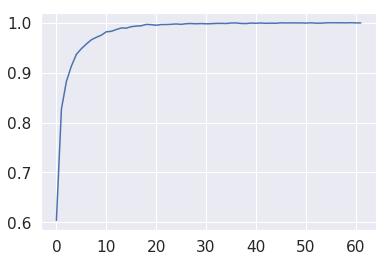

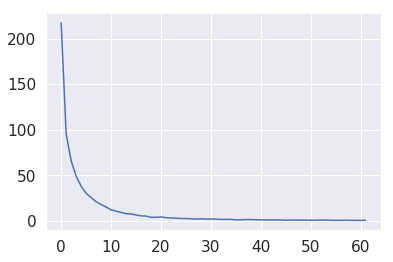

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.761375784873962, 9.6813

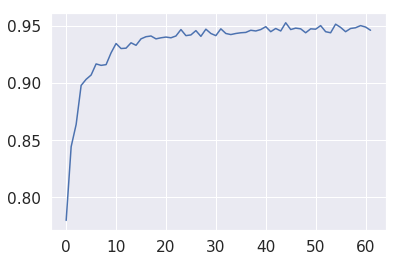

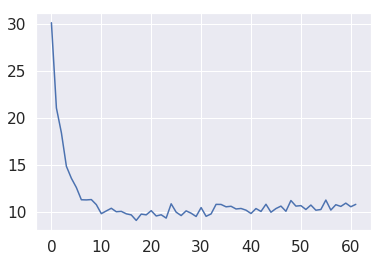


[62] accuracy: 0.946 loss: 10.800

runtime :  32608.825798511505
Train
[63, 00020] loss: 0.059 acc: 0.999
[63, 00040] loss: 0.089 acc: 1.000
[63, 00060] loss: 0.127 acc: 1.000
[63, 00080] loss: 0.202 acc: 1.000
[63, 00100] loss: 0.255 acc: 1.000
[63, 00120] loss: 0.281 acc: 1.000
[63, 00140] loss: 0.386 acc: 0.999
[63, 00160] loss: 0.479 acc: 0.999
[63, 00180] loss: 0.527 acc: 0.999
[63, 00200] loss: 0.580 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.99

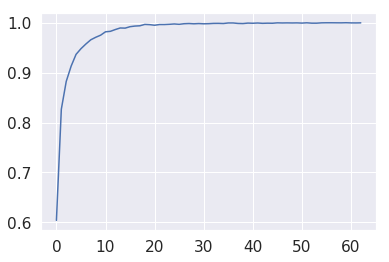

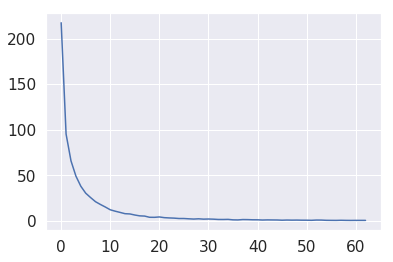

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.7613757848739

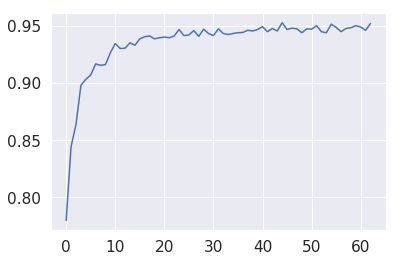

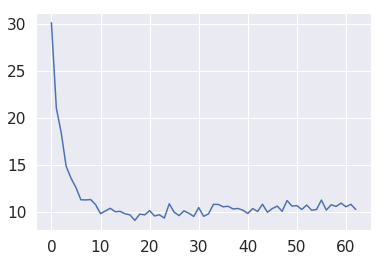


[63] accuracy: 0.952 loss: 10.256

runtime :  33136.74957990646
Train
[64, 00020] loss: 0.048 acc: 0.999
[64, 00040] loss: 0.100 acc: 1.000
[64, 00060] loss: 0.179 acc: 0.999
[64, 00080] loss: 0.246 acc: 0.999
[64, 00100] loss: 0.279 acc: 1.000
[64, 00120] loss: 0.316 acc: 1.000
[64, 00140] loss: 0.368 acc: 1.000
[64, 00160] loss: 0.458 acc: 1.000
[64, 00180] loss: 0.491 acc: 1.000
[64, 00200] loss: 0.531 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

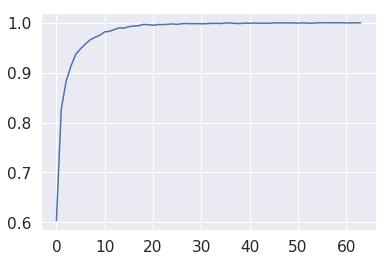

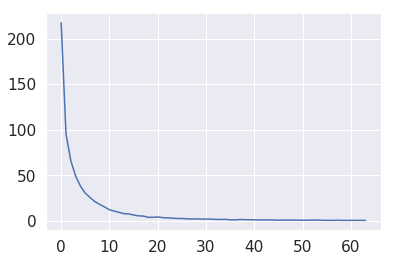

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.089036516845226, 9.76

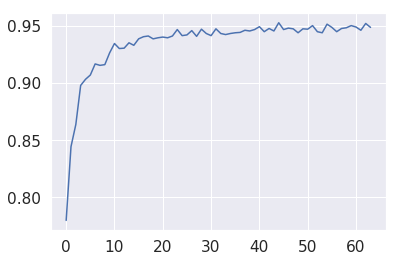

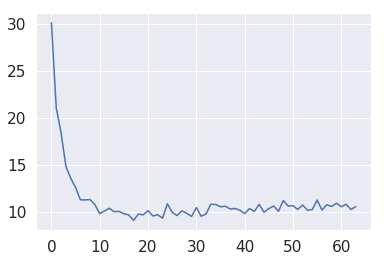


[64] accuracy: 0.948 loss: 10.551

runtime :  33668.216098070145
Train
[65, 00020] loss: 0.039 acc: 1.000
[65, 00040] loss: 0.069 acc: 1.000
[65, 00060] loss: 0.110 acc: 1.000
[65, 00080] loss: 0.150 acc: 1.000
[65, 00100] loss: 0.180 acc: 1.000
[65, 00120] loss: 0.247 acc: 1.000
[65, 00140] loss: 0.276 acc: 1.000
[65, 00160] loss: 0.312 acc: 1.000
[65, 00180] loss: 0.361 acc: 1.000
[65, 00200] loss: 0.394 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.99

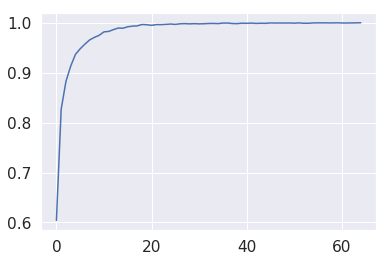

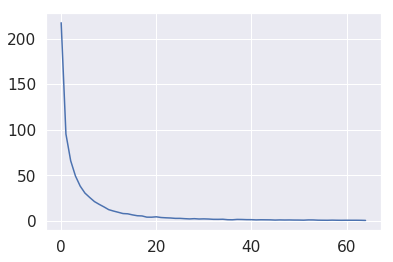

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9.0890365168

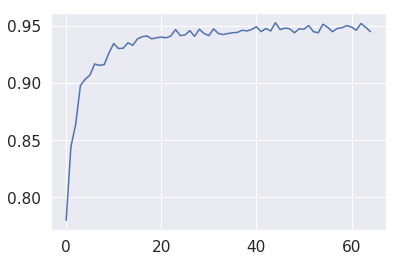

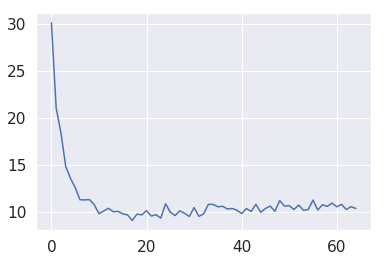


[65] accuracy: 0.945 loss: 10.362

runtime :  34200.47231340408
Train
[66, 00020] loss: 0.062 acc: 1.000
[66, 00040] loss: 0.123 acc: 1.000
[66, 00060] loss: 0.189 acc: 1.000
[66, 00080] loss: 0.214 acc: 1.000
[66, 00100] loss: 0.280 acc: 1.000
[66, 00120] loss: 0.329 acc: 1.000
[66, 00140] loss: 0.388 acc: 1.000
[66, 00160] loss: 0.451 acc: 1.000
[66, 00180] loss: 0.609 acc: 0.999
[66, 00200] loss: 0.640 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

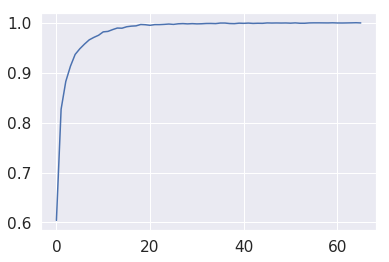

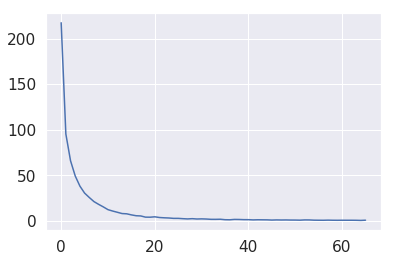

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.67776957899332, 9

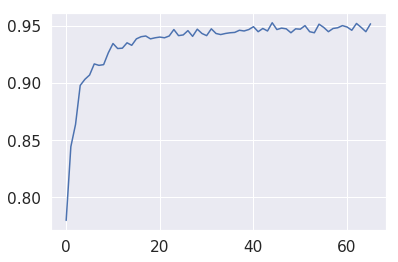

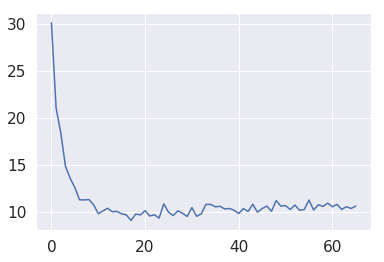


[66] accuracy: 0.952 loss: 10.620

runtime :  34729.52268433571
Train
[67, 00020] loss: 0.028 acc: 1.000
[67, 00040] loss: 0.058 acc: 1.000
[67, 00060] loss: 0.095 acc: 1.000
[67, 00080] loss: 0.142 acc: 1.000
[67, 00100] loss: 0.177 acc: 1.000
[67, 00120] loss: 0.219 acc: 1.000
[67, 00140] loss: 0.250 acc: 1.000
[67, 00160] loss: 0.305 acc: 1.000
[67, 00180] loss: 0.356 acc: 1.000
[67, 00200] loss: 0.390 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

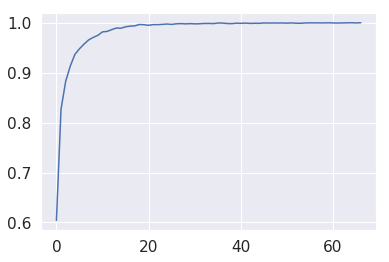

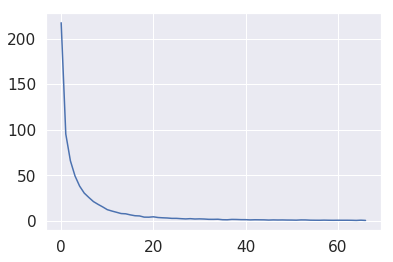

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.792690943926573, 9.677769

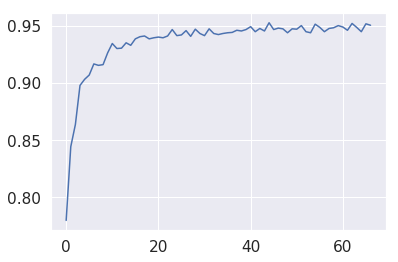

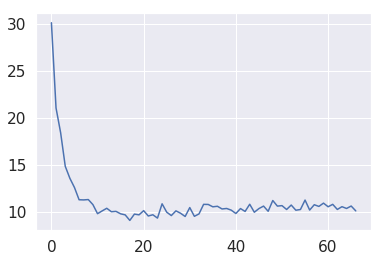


[67] accuracy: 0.950 loss: 10.102

runtime :  35261.00143671036
Train
[68, 00020] loss: 0.031 acc: 1.000
[68, 00040] loss: 0.085 acc: 1.000
[68, 00060] loss: 0.142 acc: 0.999
[68, 00080] loss: 0.181 acc: 1.000
[68, 00100] loss: 0.244 acc: 1.000
[68, 00120] loss: 0.278 acc: 1.000
[68, 00140] loss: 0.310 acc: 1.000
[68, 00160] loss: 0.352 acc: 1.000
[68, 00180] loss: 0.383 acc: 1.000
[68, 00200] loss: 0.418 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

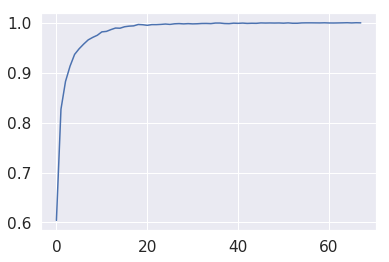

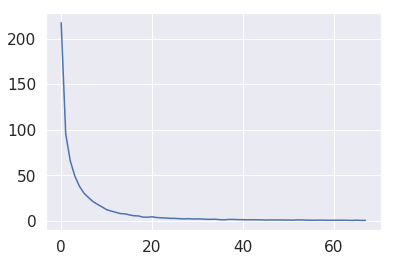

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.79269094392657

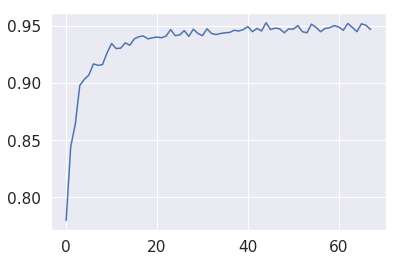

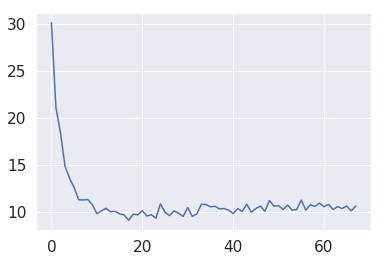


[68] accuracy: 0.947 loss: 10.633

runtime :  35791.111912965775
Train
[69, 00020] loss: 0.047 acc: 0.999
[69, 00040] loss: 0.075 acc: 1.000
[69, 00060] loss: 0.131 acc: 0.999
[69, 00080] loss: 0.191 acc: 0.999
[69, 00100] loss: 0.225 acc: 1.000
[69, 00120] loss: 0.272 acc: 1.000
[69, 00140] loss: 0.320 acc: 1.000
[69, 00160] loss: 0.363 acc: 1.000
[69, 00180] loss: 0.455 acc: 1.000
[69, 00200] loss: 0.503 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.99

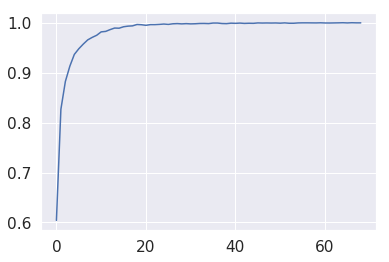

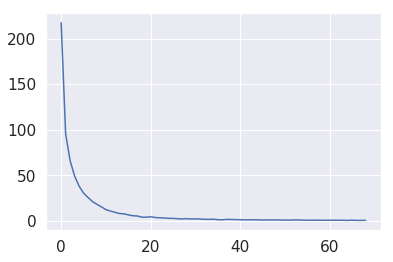

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625, 0.948125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686241, 9.7926

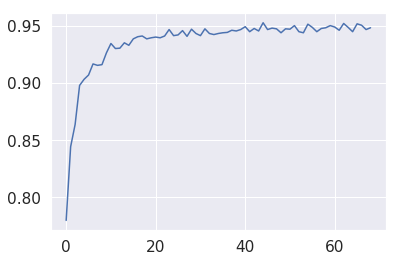

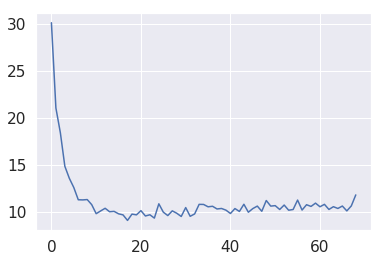


[69] accuracy: 0.948 loss: 11.805

runtime :  36319.208870887756
Train
[70, 00020] loss: 0.037 acc: 1.000
[70, 00040] loss: 0.106 acc: 1.000
[70, 00060] loss: 0.163 acc: 0.999
[70, 00080] loss: 0.210 acc: 1.000
[70, 00100] loss: 0.243 acc: 1.000
[70, 00120] loss: 0.273 acc: 1.000
[70, 00140] loss: 0.318 acc: 1.000
[70, 00160] loss: 0.356 acc: 1.000
[70, 00180] loss: 0.421 acc: 1.000
[70, 00200] loss: 0.499 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.99

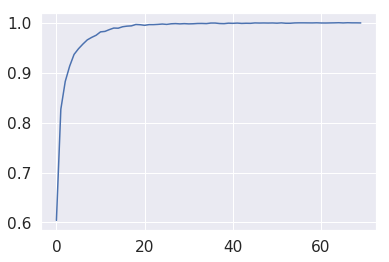

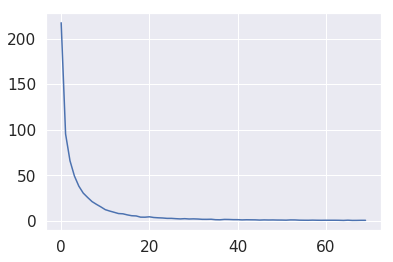

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625, 0.948125, 0.9465625]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.051810249686

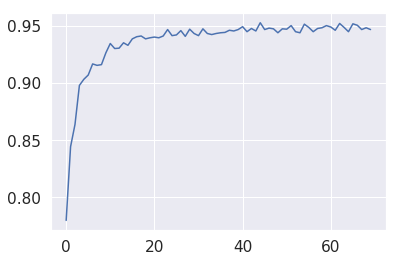

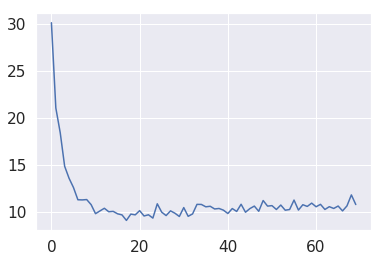


[70] accuracy: 0.947 loss: 10.779

runtime :  36842.923043489456
Train
[71, 00020] loss: 0.047 acc: 0.999
[71, 00040] loss: 0.083 acc: 1.000
[71, 00060] loss: 0.118 acc: 1.000
[71, 00080] loss: 0.153 acc: 1.000
[71, 00100] loss: 0.186 acc: 1.000
[71, 00120] loss: 0.240 acc: 1.000
[71, 00140] loss: 0.274 acc: 1.000
[71, 00160] loss: 0.300 acc: 1.000
[71, 00180] loss: 0.348 acc: 1.000
[71, 00200] loss: 0.371 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.99

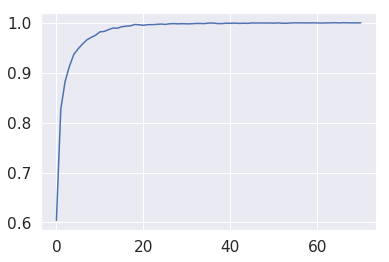

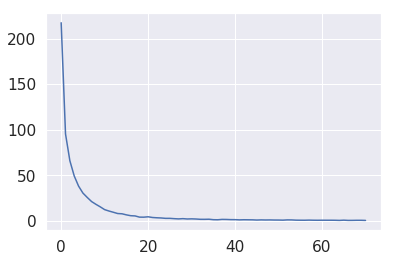

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625, 0.948125, 0.9465625, 0.9490625]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.014109373092651, 10.0

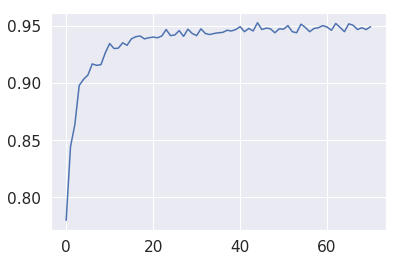

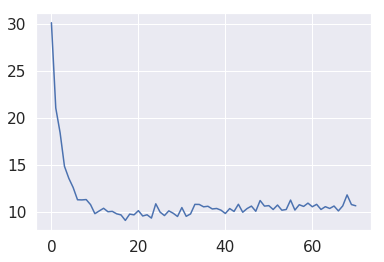


[71] accuracy: 0.949 loss: 10.645

runtime :  37364.97612261772
Train
[72, 00020] loss: 0.026 acc: 1.000
[72, 00040] loss: 0.050 acc: 1.000
[72, 00060] loss: 0.103 acc: 1.000
[72, 00080] loss: 0.153 acc: 1.000
[72, 00100] loss: 0.188 acc: 1.000
[72, 00120] loss: 0.215 acc: 1.000
[72, 00140] loss: 0.257 acc: 1.000
[72, 00160] loss: 0.290 acc: 1.000
[72, 00180] loss: 0.343 acc: 1.000
[72, 00200] loss: 0.388 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

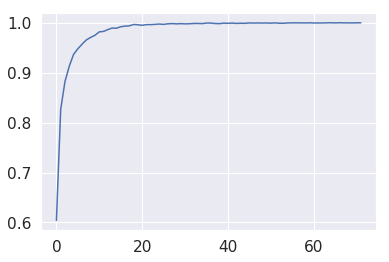

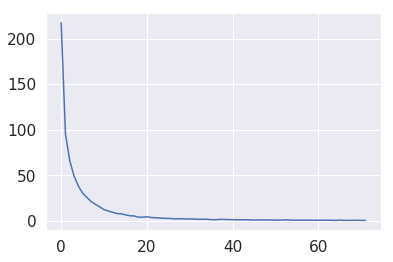

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625, 0.948125, 0.9465625, 0.9490625, 0.949375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.01410937309

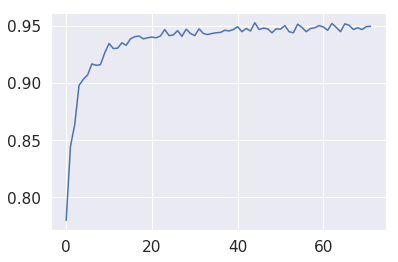

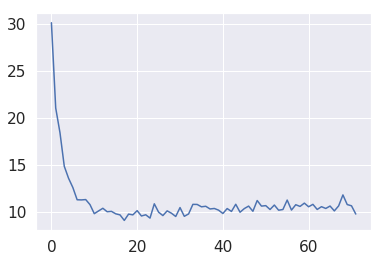


[72] accuracy: 0.949 loss: 9.767

runtime :  37892.899527311325
Train
[73, 00020] loss: 0.023 acc: 1.000
[73, 00040] loss: 0.064 acc: 1.000
[73, 00060] loss: 0.100 acc: 1.000
[73, 00080] loss: 0.147 acc: 1.000
[73, 00100] loss: 0.190 acc: 1.000
[73, 00120] loss: 0.245 acc: 1.000
[73, 00140] loss: 0.273 acc: 1.000
[73, 00160] loss: 0.301 acc: 1.000
[73, 00180] loss: 0.326 acc: 1.000
[73, 00200] loss: 0.374 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

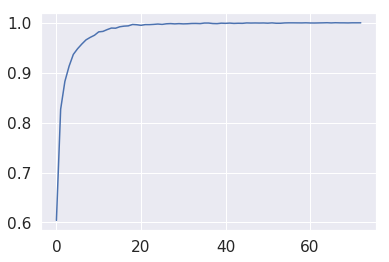

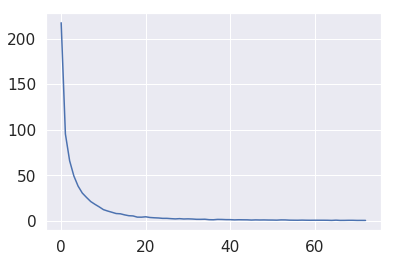

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625, 0.948125, 0.9465625, 0.9490625, 0.949375, 0.9496875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38093101978302, 10.

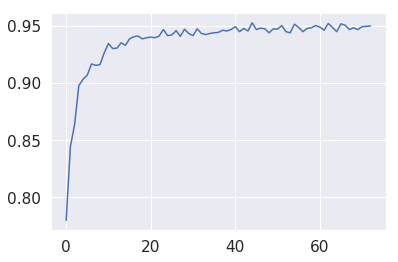

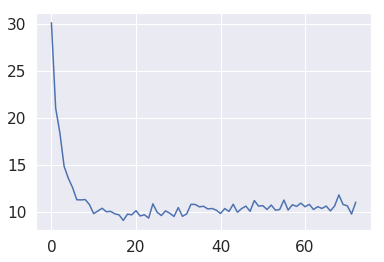


[73] accuracy: 0.950 loss: 11.031

runtime :  38418.41071152687
Train
[74, 00020] loss: 0.024 acc: 1.000
[74, 00040] loss: 0.096 acc: 1.000
[74, 00060] loss: 0.145 acc: 1.000
[74, 00080] loss: 0.168 acc: 1.000
[74, 00100] loss: 0.210 acc: 1.000
[74, 00120] loss: 0.247 acc: 1.000
[74, 00140] loss: 0.279 acc: 1.000
[74, 00160] loss: 0.316 acc: 1.000
[74, 00180] loss: 0.337 acc: 1.000
[74, 00200] loss: 0.360 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

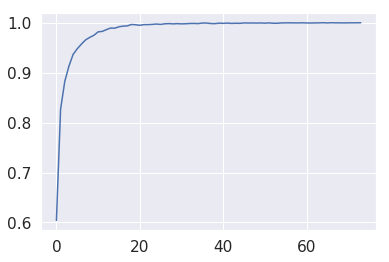

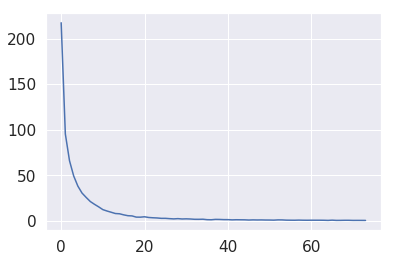

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625, 0.948125, 0.9465625, 0.9490625, 0.949375, 0.9496875, 0.95]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.3809310197830

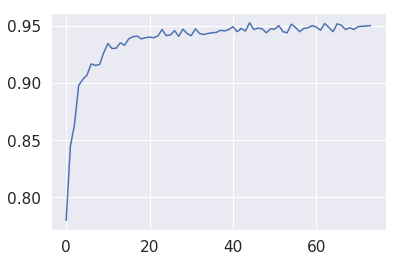

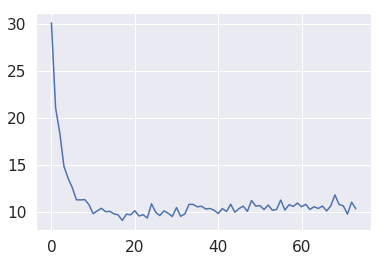


[74] accuracy: 0.950 loss: 10.325

runtime :  38939.06186723709
Train
[75, 00020] loss: 0.032 acc: 1.000
[75, 00040] loss: 0.078 acc: 1.000
[75, 00060] loss: 0.101 acc: 1.000
[75, 00080] loss: 0.120 acc: 1.000
[75, 00100] loss: 0.153 acc: 1.000
[75, 00120] loss: 0.237 acc: 1.000
[75, 00140] loss: 0.282 acc: 1.000
[75, 00160] loss: 0.355 acc: 1.000
[75, 00180] loss: 0.413 acc: 1.000
[75, 00200] loss: 0.443 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

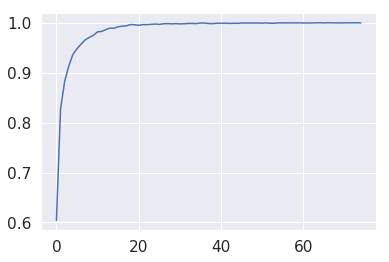

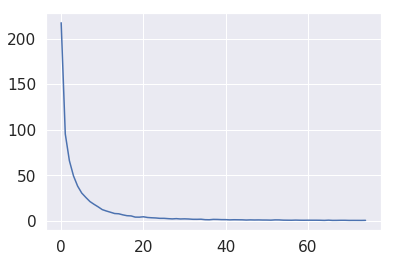

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625, 0.948125, 0.9465625, 0.9490625, 0.949375, 0.9496875, 0.95, 0.9509375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.099910825490952, 10.38

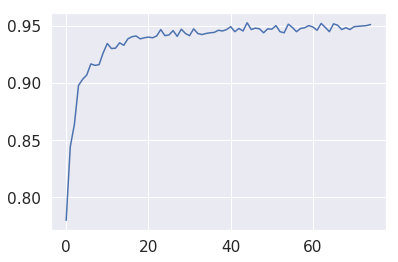

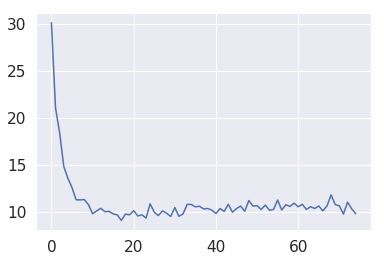


[75] accuracy: 0.951 loss: 9.795

runtime :  39466.00232338905
Train
[76, 00020] loss: 0.053 acc: 1.000
[76, 00040] loss: 0.081 acc: 1.000
[76, 00060] loss: 0.138 acc: 1.000
[76, 00080] loss: 0.185 acc: 1.000
[76, 00100] loss: 0.242 acc: 1.000
[76, 00120] loss: 0.310 acc: 0.999
[76, 00140] loss: 0.336 acc: 1.000
[76, 00160] loss: 0.374 acc: 1.000
[76, 00180] loss: 0.438 acc: 1.000
[76, 00200] loss: 0.493 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.9992

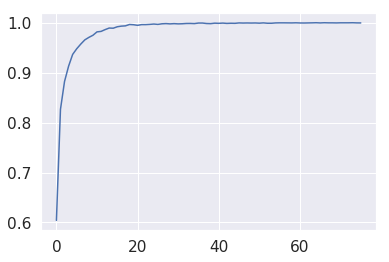

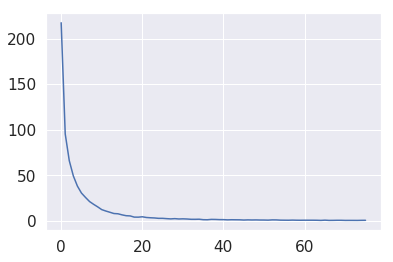

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625, 0.948125, 0.9465625, 0.9490625, 0.949375, 0.9496875, 0.95, 0.9509375, 0.95625]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.0999108254909

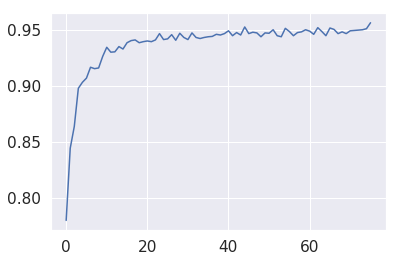

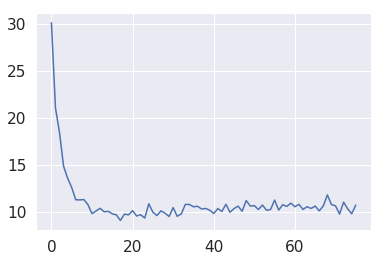


[76] accuracy: 0.956 loss: 10.715

runtime :  39992.84747552872
Train
[77, 00020] loss: 0.046 acc: 0.999
[77, 00040] loss: 0.094 acc: 1.000
[77, 00060] loss: 0.145 acc: 0.999
[77, 00080] loss: 0.185 acc: 1.000
[77, 00100] loss: 0.209 acc: 1.000
[77, 00120] loss: 0.254 acc: 1.000
[77, 00140] loss: 0.276 acc: 1.000
[77, 00160] loss: 0.312 acc: 1.000
[77, 00180] loss: 0.331 acc: 1.000
[77, 00200] loss: 0.359 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

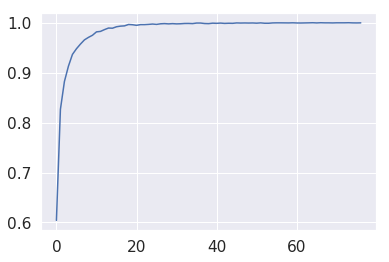

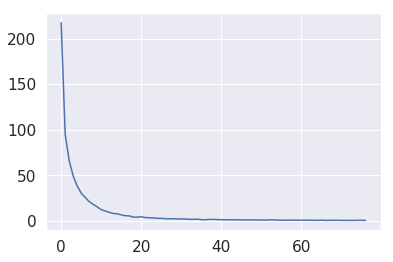

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625, 0.948125, 0.9465625, 0.9490625, 0.949375, 0.9496875, 0.95, 0.9509375, 0.95625, 0.9521875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169509, 10.09

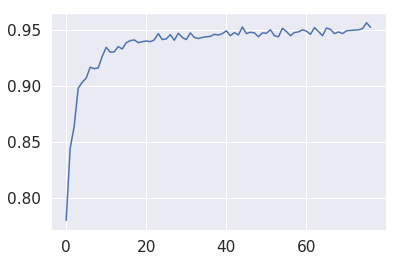

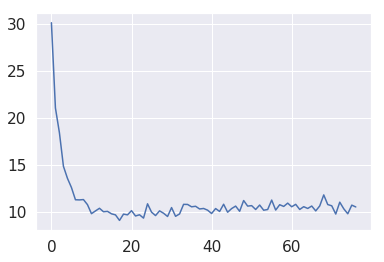


[77] accuracy: 0.952 loss: 10.523

runtime :  40517.70203208923
Train
[78, 00020] loss: 0.013 acc: 1.000
[78, 00040] loss: 0.071 acc: 1.000
[78, 00060] loss: 0.088 acc: 1.000
[78, 00080] loss: 0.130 acc: 1.000
[78, 00100] loss: 0.152 acc: 1.000
[78, 00120] loss: 0.222 acc: 0.999
[78, 00140] loss: 0.244 acc: 1.000
[78, 00160] loss: 0.275 acc: 1.000
[78, 00180] loss: 0.351 acc: 0.999
[78, 00200] loss: 0.381 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

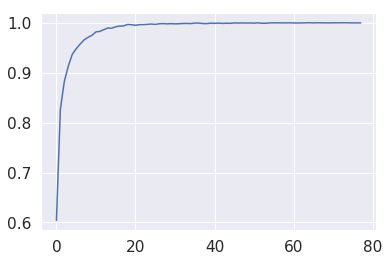

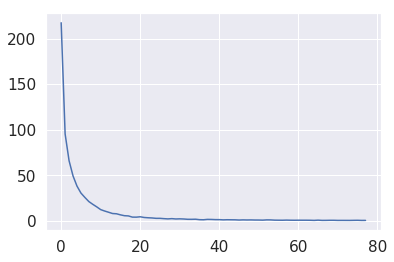

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625, 0.948125, 0.9465625, 0.9490625, 0.949375, 0.9496875, 0.95, 0.9509375, 0.95625, 0.9521875, 0.949375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.80684107169

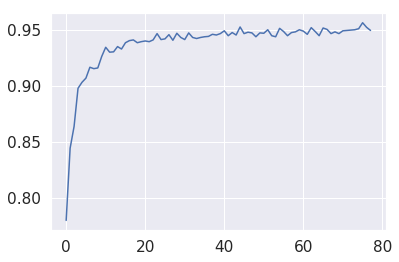

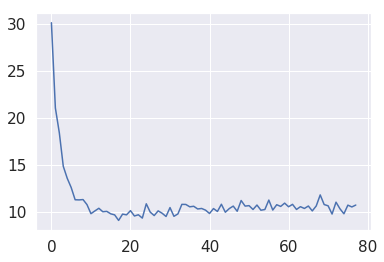


[78] accuracy: 0.949 loss: 10.725

runtime :  41044.7860519886
Train
[79, 00020] loss: 0.037 acc: 0.999
[79, 00040] loss: 0.059 acc: 1.000
[79, 00060] loss: 0.085 acc: 1.000
[79, 00080] loss: 0.142 acc: 1.000
[79, 00100] loss: 0.171 acc: 1.000
[79, 00120] loss: 0.212 acc: 1.000
[79, 00140] loss: 0.273 acc: 1.000
[79, 00160] loss: 0.315 acc: 1.000
[79, 00180] loss: 0.342 acc: 1.000
[79, 00200] loss: 0.407 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.9992

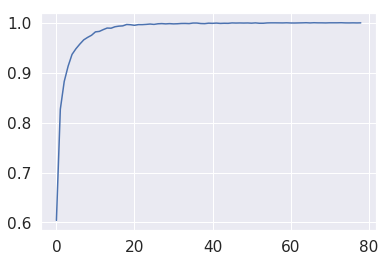

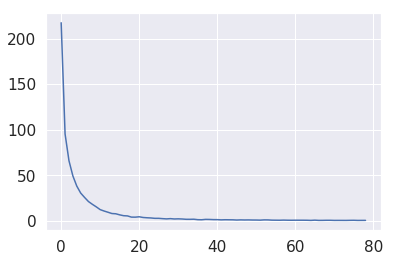

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625, 0.948125, 0.9465625, 0.9490625, 0.949375, 0.9496875, 0.95, 0.9509375, 0.95625, 0.9521875, 0.949375, 0.951875]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.769609957933426, 9.8

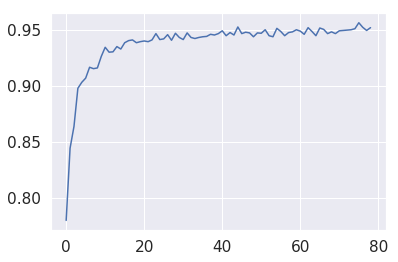

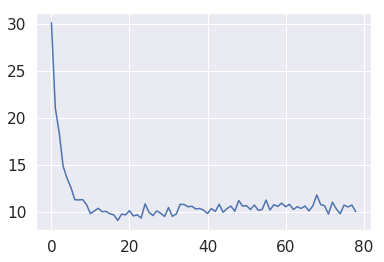


[79] accuracy: 0.952 loss: 10.013

runtime :  41575.235736608505
Train
[80, 00020] loss: 0.043 acc: 1.000
[80, 00040] loss: 0.111 acc: 1.000
[80, 00060] loss: 0.162 acc: 0.999
[80, 00080] loss: 0.192 acc: 1.000
[80, 00100] loss: 0.218 acc: 1.000
[80, 00120] loss: 0.246 acc: 1.000
[80, 00140] loss: 0.283 acc: 1.000
[80, 00160] loss: 0.343 acc: 1.000
[80, 00180] loss: 0.406 acc: 1.000
[80, 00200] loss: 0.481 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.99

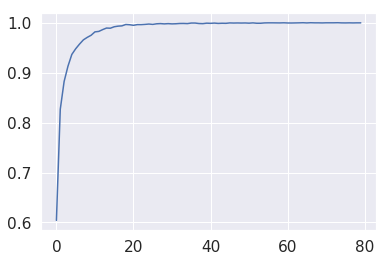

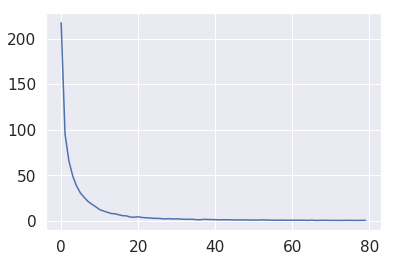

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625, 0.948125, 0.9465625, 0.9490625, 0.949375, 0.9496875, 0.95, 0.9509375, 0.95625, 0.9521875, 0.949375, 0.951875, 0.95125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.76960995793

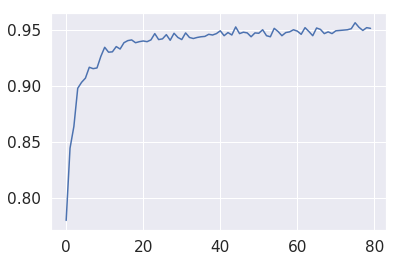

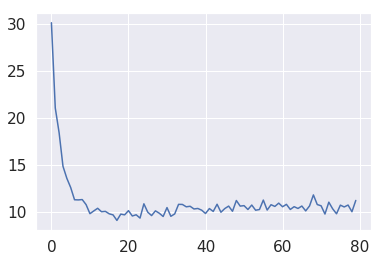


[80] accuracy: 0.951 loss: 11.216

runtime :  42103.40872955322
Train
[81, 00020] loss: 0.059 acc: 0.998
[81, 00040] loss: 0.091 acc: 0.999
[81, 00060] loss: 0.114 acc: 0.999
[81, 00080] loss: 0.159 acc: 0.999
[81, 00100] loss: 0.191 acc: 1.000
[81, 00120] loss: 0.231 acc: 1.000
[81, 00140] loss: 0.264 acc: 1.000
[81, 00160] loss: 0.305 acc: 1.000
[81, 00180] loss: 0.347 acc: 1.000
[81, 00200] loss: 0.373 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

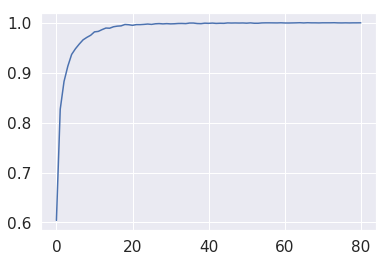

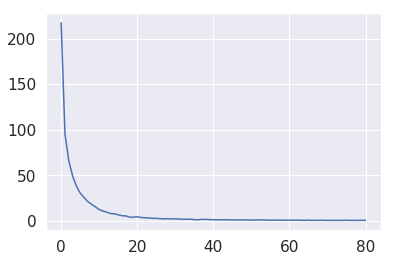

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625, 0.948125, 0.9465625, 0.9490625, 0.949375, 0.9496875, 0.95, 0.9509375, 0.95625, 0.9521875, 0.949375, 0.951875, 0.95125, 0.950625]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.30868910253048, 10.7

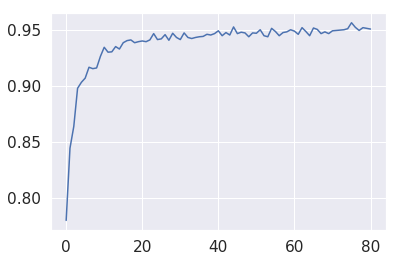

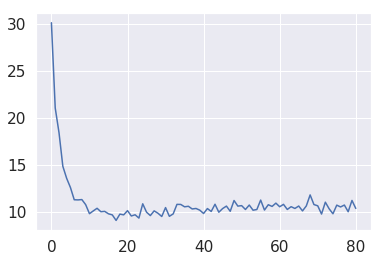


[81] accuracy: 0.951 loss: 10.366

runtime :  42629.00677609444
Train
[82, 00020] loss: 0.038 acc: 1.000
[82, 00040] loss: 0.074 acc: 1.000
[82, 00060] loss: 0.097 acc: 1.000
[82, 00080] loss: 0.139 acc: 1.000
[82, 00100] loss: 0.174 acc: 1.000
[82, 00120] loss: 0.243 acc: 1.000
[82, 00140] loss: 0.280 acc: 1.000
[82, 00160] loss: 0.337 acc: 1.000
[82, 00180] loss: 0.373 acc: 1.000
[82, 00200] loss: 0.395 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.999

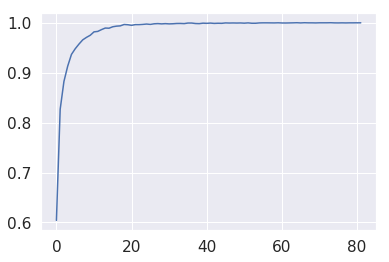

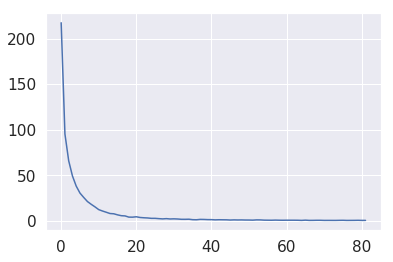

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625, 0.948125, 0.9465625, 0.9490625, 0.949375, 0.9496875, 0.95, 0.9509375, 0.95625, 0.9521875, 0.949375, 0.951875, 0.95125, 0.950625, 0.9534375]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.308689102

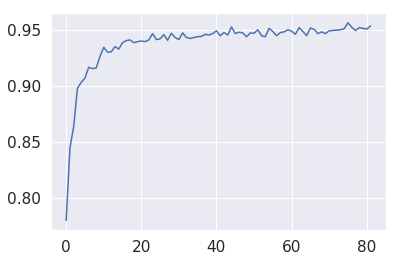

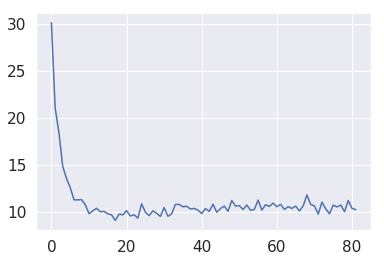


[82] accuracy: 0.953 loss: 10.243

runtime :  43152.1896879673
Train
[83, 00020] loss: 0.057 acc: 0.998
[83, 00040] loss: 0.097 acc: 0.998
[83, 00060] loss: 0.233 acc: 0.999
[83, 00080] loss: 0.254 acc: 0.999
[83, 00100] loss: 0.289 acc: 0.999
[83, 00120] loss: 0.336 acc: 0.999
[83, 00140] loss: 0.387 acc: 0.999
[83, 00160] loss: 0.403 acc: 1.000
[83, 00180] loss: 0.465 acc: 0.999
[83, 00200] loss: 0.557 acc: 0.999
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.9992

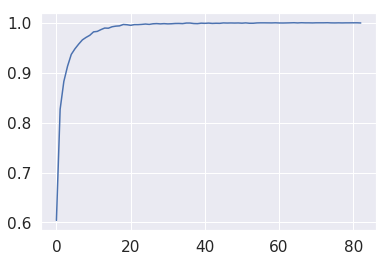

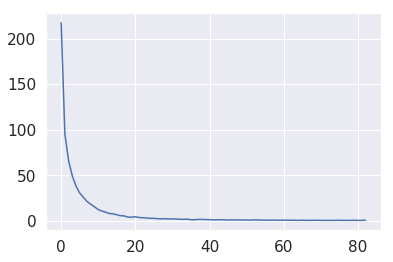

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625, 0.948125, 0.9465625, 0.9490625, 0.949375, 0.9496875, 0.95, 0.9509375, 0.95625, 0.9521875, 0.949375, 0.951875, 0.95125, 0.950625, 0.9534375, 0.9475]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.272518284618855, 11.3

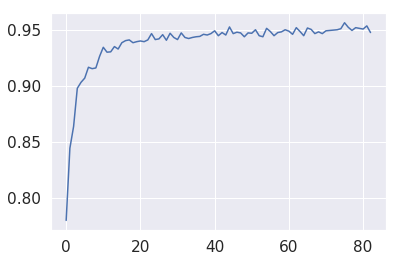

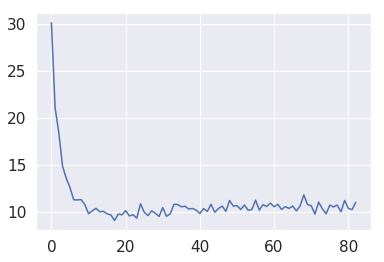


[83] accuracy: 0.948 loss: 11.019

runtime :  43681.789279937744
Train
[84, 00020] loss: 0.047 acc: 1.000
[84, 00040] loss: 0.096 acc: 1.000
[84, 00060] loss: 0.118 acc: 1.000
[84, 00080] loss: 0.171 acc: 1.000
[84, 00100] loss: 0.195 acc: 1.000
[84, 00120] loss: 0.222 acc: 1.000
[84, 00140] loss: 0.257 acc: 1.000
[84, 00160] loss: 0.289 acc: 1.000
[84, 00180] loss: 0.347 acc: 1.000
[84, 00200] loss: 0.410 acc: 1.000
[0.6040625, 0.826640625, 0.88234375, 0.91296875, 0.936484375, 0.9478125, 0.9571875, 0.965625, 0.970625, 0.97484375, 0.981640625, 0.982578125, 0.986171875, 0.989296875, 0.988984375, 0.991875, 0.993125, 0.993671875, 0.99640625, 0.9959375, 0.994765625, 0.996171875, 0.996171875, 0.996640625, 0.99734375, 0.996640625, 0.9978125, 0.998203125, 0.99765625, 0.998125, 0.99765625, 0.997890625, 0.9984375, 0.998515625, 0.998203125, 0.999296875, 0.999296875, 0.998359375, 0.998125, 0.9990625, 0.99875, 0.99921875, 0.99859375, 0.99890625, 0.99875, 0.99953125, 0.999296875, 0.999453125, 0.99

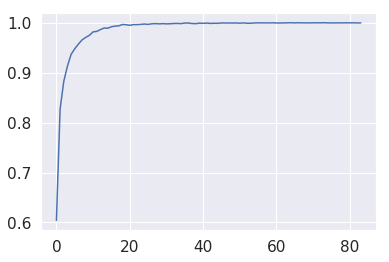

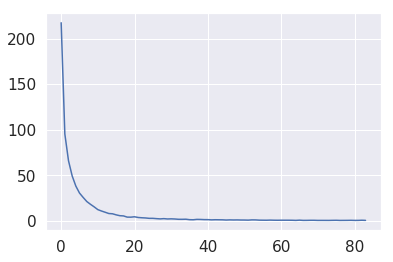

Validation
[0.78, 0.844375, 0.86375, 0.8978125, 0.903125, 0.906875, 0.9165625, 0.9153125, 0.9159375, 0.92625, 0.934375, 0.93, 0.9303125, 0.935, 0.9328125, 0.9384375, 0.9403125, 0.9409375, 0.9384375, 0.939375, 0.94, 0.939375, 0.9409375, 0.9465625, 0.94125, 0.941875, 0.945625, 0.940625, 0.946875, 0.943125, 0.94125, 0.9471875, 0.943125, 0.9421875, 0.943125, 0.94375, 0.9440625, 0.9459375, 0.9453125, 0.9465625, 0.9490625, 0.9446875, 0.9475, 0.9453125, 0.9525, 0.9465625, 0.9478125, 0.9471875, 0.94375, 0.9471875, 0.946875, 0.95, 0.9446875, 0.94375, 0.95125, 0.9484375, 0.9446875, 0.9475, 0.948125, 0.95, 0.94875, 0.9459375, 0.951875, 0.9484375, 0.9446875, 0.9515625, 0.9503125, 0.9465625, 0.948125, 0.9465625, 0.9490625, 0.949375, 0.9496875, 0.95, 0.9509375, 0.95625, 0.9521875, 0.949375, 0.951875, 0.95125, 0.950625, 0.9534375, 0.9475, 0.9478125]
[30.13617369532585, 21.062145113945007, 18.416689708828926, 14.853584602475166, 13.574537262320518, 12.591457433998585, 11.288804687559605, 11.2725182846

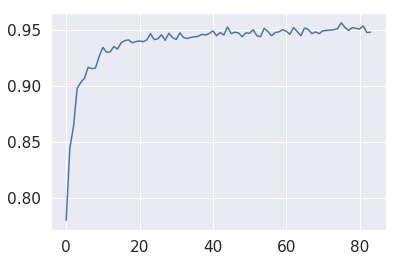

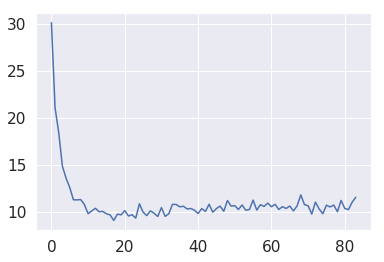


[84] accuracy: 0.948 loss: 11.553

runtime :  44209.12172150612
Train
[85, 00020] loss: 0.033 acc: 1.000
[85, 00040] loss: 0.099 acc: 0.999


In [ ]:
train_acc = []
train_loss = []
val_acc = []
val_loss = []
import time
start_time = time.time()
for epoch in range(EPOCH):
    print("Train")
    total = 0
    correct = 0
    running_loss = 0.0
    for step, (labels, images,_) in enumerate(trainloader):
        optimizer.zero_grad()
#         print("in Train: ", images.shape, labels.shape)
#         images = images.detach()
#         labels = labels.detach()
        images = images.detach().cuda()
        labels = labels.detach().cuda()
        outputs = model(images)
        
        # loss
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        acc = correct / total

        if step % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %05d] loss: %.3f acc: %.3f' %
                  (epoch + 1, step + 1, running_loss, acc))

    train_acc.append(acc)
    train_loss.append(running_loss)
    print(train_acc)
    print(train_loss)
    plt.figure()
    plt.plot(range(0,epoch+1), train_acc)
    plt.savefig(model_directory + "train_acc_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    plt.figure()
    plt.plot(range(0,epoch+1), train_loss)
    plt.savefig(model_directory + "train_loss_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    
    # Evaluate validation set
    print("Validation")
    total = 0
    correct = 0
    running_loss = 0.0
    for step, (labels, images,_) in enumerate(valloader):
        optimizer.zero_grad()
        images = images.detach().cuda()
        labels = labels.detach().cuda()
#         images = images.detach()
#         labels = labels.detach()
        outputs = model(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        running_loss += loss.item()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        acc = correct / total
    
    val_acc.append(acc)
    val_loss.append(running_loss)
    print(val_acc)
    print(val_loss)
    plt.figure()
    plt.plot(range(0,epoch+1), val_acc)
    plt.savefig(model_directory + "val_acc_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    plt.figure()
    plt.plot(range(0,epoch+1), val_loss)
    plt.savefig(model_directory + "val_loss_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    
    print('\n[%d] accuracy: %.3f loss: %.3f\n' % (epoch + 1, acc, running_loss))
    running_loss = 0.0
    # Saving model
    model_path = PJ(model_directory, "%03d_weights.pt" % (epoch+1))
    torch.save(model.state_dict(), model_path)
    runtime = time.time() - start_time
    print("runtime : ", runtime)

In [ ]:
print("runtime : ", runtime)
resultfile = open(model_directory+"train_results.txt", "a")
resultfile.write("train")
resultfile.write(str(train_acc))
resultfile.write("\n")
resultfile.write(str(train_loss))
resultfile.write("\n")
resultfile.write("validation")
resultfile.write("\n")
resultfile.write(str(val_acc))
resultfile.write("\n")
resultfile.write(str(val_loss))
resultfile.write("\n")
resultfile.close()

# TEST
### evaluate
### test every model
### saliency map

In [ ]:
transform = transform_set(train=False)
testset = TermiteDataset(TestFile, transform)
testloader = Data.DataLoader(
    dataset=testset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=0,              # 多线程来读数据
)

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
test_acc = []
test_loss = []
# classes2 = ["O. formosanus Worker","C. formosanus Worker", "C. domesticus Worker", "R. flaviceps Worker"]
import time
start = time.time()
for model_num in range(1, EPOCH+1):
    wrong_images = []
    wrong_answer = []
    actual_answer = []
    weight_path = model_directory + "%03d_weights.pt" % (model_num)
    state_dict = torch.load(weight_path)
    model.load_state_dict(state_dict)
    running_loss = 0.0
    total = 0
    correct = 0
    confusion_matrix = torch.zeros(len(classes), len(classes))
    for step, (labels, images, paths) in enumerate(testloader):
        optimizer.zero_grad()
        images = images.detach().cuda()
        labels = labels.detach().cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        # append to the wrong list (test log file)
        for i in range(len(predicted)):
            if predicted[i] != labels[i]:
#                 print(paths[i], predicted[i], labels[i])
                wrong_images.append(paths[i])
                wrong_answer.append(predicted[i].item())
                actual_answer.append(labels[i].item())
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for t, p in zip(labels.view(-1), predicted.view(-1)):
#             print(t.item(), p.item())
#             mapp = { 1: 0,
#                     3: 1,
#                     5: 2,
#                     6: 3}
#             confusion_matrix[mapp[t.item()], mapp[p.item()]] += 1
            confusion_matrix[t.item(), p.item()] += 1
    
    running_acc = correct / total
    print('\n[%d] accuracy: %.3f loss: %.3f\n' % (model_num, running_acc, running_loss))
    
    test_acc.append(running_acc)
    test_loss.append(running_loss)
    print(test_acc)
    print(test_loss)
    plt.figure()
    plt.plot(range(0,model_num), test_acc)
    plt.savefig(temp_directory + "test_acc_E%03d.jpg" % (model_num), dpi=500)
    plt.show()
    plt.figure()
    plt.plot(range(0,model_num), test_loss)
    plt.savefig(temp_directory + "test_loss_E%03d.jpg" % (model_num), dpi=500)
    plt.show()
    
    
    print(wrong_answer)
    with open(temp_directory + "%03d_wrong.txt" % (model_num), 'w') as wrong:
#         c = zip(wrong_images, wrong_answer, actual_answer)
#         c = sorted(c)
#         (wrong_images, wrong_answer, actual_answer) = zip(*c)
#         print(wrong_images)
        for i in range(len(wrong_images)):
            wrong.write(wrong_images[i] + " " + classes[wrong_answer[i]] + " " + classes[actual_answer[i]])
#             print(wrong_images[i] + " " + classes[wrong_answer[i]] + " " + classes[actual_answer[i]])
            wrong.write("\n")
        wrong.close()
#     print(confusion_matrix)
    confusion_matrix = confusion_matrix.numpy().astype(int)
#     print(confusion_matrix)
    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in classes],
                  columns = [i for i in classes])
    print(df_cm)
    sn.set(font_scale=1.4)#for label size
#     print(classes)
    img = sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="d")
    figure = img.get_figure()
    plt.tight_layout()
    plt.savefig(temp_directory + "confusion_matrix_%03d.jpg" % (model_num), dpi=500)
    plt.show()
    runtime = time.time() - start
    print("runtime : ", runtime)

In [ ]:
print("runtime : ", runtime)
resultfile = open(model_directory+"test_results.txt", "a")
resultfile.write("test")
resultfile.write("\n")
resultfile.write(str(test_acc))
resultfile.write("\n")
resultfile.write(str(test_loss))
resultfile.write("\n")
resultfile.close()


In [ ]:
print("train_acc\n",train_acc,"\n\n\train_loss\n",train_loss,"\n\n\val_acc\n",val_acc,"\n\n\val_loss\n",val_loss,"\n\n\test_acc\n",test_acc,"\n\n\test_loss\n",test_loss)

In [ ]:
print("train_acc\n",len(train_acc),"\n\n\train_loss\n",len(train_loss),"\n\n\val_acc\n",len(val_acc),"\n\n\val_loss\n",len(val_loss),"\n\n\test_acc\n",len(test_acc),"\n\n\test_loss\n",len(test_loss))